In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import matplotlib as mpl

# About Data
Data terdiri dari informasi bangunan di wilayah yang terkena gempa yang digunakan untuk babak penyisihan JOINTS UGM 2023

Dataset terdiri dari beberapa kolom diantaranya :
1. floors_before_eq (total) : jumlah total lantai pada bangunan sebelum gempa terjadi
2. old_building : usia bangunan (tahun)
3. plinth_area (ft^2) : luas bangunan (ft^2)
4. height_before_eq (ft) : tinggi bangunan sebelum terjadi gempa (kaki)
5. land_surface_condition : kondisi permukaan tanah disaat bangunan akan dibangun
6. type_of_foundation : jenis fondasi yang dipakai untuk bangunan tsb
7. type_of_roof : jenis atap yang dipakai untuk bangunan tsb
8. type_of_ground_floor : jenis lantai yang dipakai untuk ground-floor
9. type_of_other_floor : jenis lantai yang dipakai untuk selain ground-floor
10. position : Posisi bangunan tersebut apakah bersisian secara langsung dengan bangunan lain
11. building_plan_configuration : konfigurasi bangunan yang berkaitan dengan bentuk, ukuran, dan penempatan struktur utama bangunan
12. technical_solution_proposed : Solusi yang ditawarkan untuk bangunan yang terdampak gempa
13. legal_ownership_status : Status kepemilikan bangunan
14. has_secondary_use : Keterangan apakah bangunan memiliki kegunaan sekunder
15. type_of_reinforcement_concrete : Tipe beton bertulang/reinforcement concrete
16. residential_type : Tipe penggunaaan sebagai hunian
17. no_family_residing : Jumlah keluarga yang tinggal dalam bangunan tersebut
18. public_place_type : Tipe penggunaan sebagai tempat umum
19. industrial_use_type : Tipe industri
20. govermental_use_type : Tipe penggunaan sebagai bangunan pemerintahan
21. flexible_superstructure : Keterangan penggunaan superstructure yang fleksibel
22. wall_binding : Material yang digunakan sebagai perekat bahan pembentuk dinding
23. wall_material : Material dasar sebagai pembangun dinding
24. damage_grade (variabel target) : Tingkat kerusakan yang disebabkan oleh gempa (1-5)

Hal ini ditambah dengan beberapa penjelasan fitur :

wall_binding
- 0 : Unknown/not stated
- 1 : Clay
- 2 : Mortar + Cement
- 3 : Mortar + Cement, Clay
- 5 : Mud + Mortar, Clay
- 7 : Mud + Mortar, Clay, Cement + Mortar

wall_material
- 0 : Unknown/not stated
- 1 : Red Bricks
- 2 : Stone Bricks
- 3 : Red Bricks, Stone Bricks

type_of_reinforcement_concrete
- 0 : No reinforcement concrete
- 1 : Has non-engineered reinforcement concrete
- 2 : Has engineered reinforcement concrete
- 3 : Has both

# Tujuan
Menganalisis karakteristik bangunan yang memiliki tingkat kerusakan yang rendah

# Import

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Analisis Sekilas Data

In [15]:
df = pd.read_csv('/home/firh/Documents/GitHub/JOINTS-UGM/Datasets/train.csv.zip', compression='zip',index_col = 'Unnamed: 0')
df = df.sort_index()
df = df.reset_index(drop=True)
df.head()

/tmp/ipykernel_9320/1923358296.py:1: DtypeWarning: Columns (1,3,5,6,7,8,9,10,11,12,13,16,17,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/home/firh/Documents/GitHub/JOINTS-UGM/Datasets/train.csv.zip', compression='zip',index_col = 'Unnamed: 0')


floors_before_eq (total)  old_building plinth_area (ft^2)  \
0                floor two           1.0           256 ft^2   
1                  Floor 3           3.0           985 ft^2   
2                Two Floor           7.0                NaN   
3                Two Floor           7.0                NaN   
4                      two          18.0           185 ft^2   

   height_before_eq (ft) land_surface_condition  \
0                   22.0                   Flat   
1                   18.0                   Flat   
2                   14.0                   Flat   
3                   14.0                   Flat   
4                   15.0                   Flat   

                   type_of_foundation                          type_of_roof  \
0                    Bamboo or Timber              Bamboo/Timber Light roof   
1  Clay Sand Mixed mortar-Stone/Brick  Wood Light Roof or Bamboo Heavy Roof   
2              Mud mortar-Stone/Brick                                   NaN   
3              Mud mortar-Stone/Brick                                   NaN   
4  Clay Sand Mixed mortar-Stone/Brick  Wood Light Roof or Bamboo Light Roof   

  type_of_ground_floor     type_of_other_floor      position  ...  \
0                 Clay       TImber/Bamboo-Mud  Not attached  ...   
1                 Clay       TImber/Bamboo-Mud  Not attached  ...   
2                 Clay  Wood-Mud or Bamboo Mud  Not attached  ...   
3                 Clay  Wood-Mud or Bamboo Mud  Not attached  ...   
4                 Clay       TImber/Bamboo-Mud  Not attached  ...   

  type_of_reinforcement_concrete residential_type no_family_residing  \
0                            0.0  Non-residential                1.0   
1                            0.0  Non-residential                1.0   
2                            0.0  Non-residential                1.0   
3                            0.0  Non-residential                1.0   
4                            0.0  Non-residential                1.0   

   public_place_type  industrial_use_type govermental_use_type  \
0         Non-public       Non-industrial      Non-govermental   
1         Non-public       Non-industrial      Non-govermental   
2         Non-public       Non-industrial      Non-govermental   
3         Non-public       Non-industrial      Non-govermental   
4         Non-public       Non-industrial      Non-govermental   

  flexible_superstructure wall_binding wall_material damage_grade  
0             unavailable          0.0           0.0          1.0  
1             unavailable          5.0           2.0          5.0  
2             unavailable          5.0           2.0          5.0  
3             unavailable          5.0           2.0          5.0  
4             unavailable          5.0           2.0          4.0  

[5 rows x 24 columns]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722815 entries, 0 to 722814
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   floors_before_eq (total)        390009 non-null  object 
 1   old_building                    483611 non-null  float64
 2   plinth_area (ft^2)              301607 non-null  object 
 3   height_before_eq (ft)           390009 non-null  float64
 4   land_surface_condition          421209 non-null  object 
 5   type_of_foundation              483611 non-null  object 
 6   type_of_roof                    301607 non-null  object 
 7   type_of_ground_floor            390009 non-null  object 
 8   type_of_other_floor             421209 non-null  object 
 9   position                        410809 non-null  object 
 10  building_plan_configuration     421209 non-null  object 
 11  technical_solution_proposed     46801 non-null   object 
 12  legal_ownership_

### Terlihat beberapa missing value pada data, berikut adalah jumlah untuk setiap fitur

In [17]:
df.isna().sum()

floors_before_eq (total)          332806
old_building                      239204
plinth_area (ft^2)                421208
height_before_eq (ft)             332806
land_surface_condition            301606
type_of_foundation                239204
type_of_roof                      421208
type_of_ground_floor              332806
type_of_other_floor               301606
position                          312006
building_plan_configuration       301606
technical_solution_proposed       676014
legal_ownership_status            124802
has_secondary_use                 197604
type_of_reinforcement_concrete    291206
residential_type                  270404
no_family_residing                145602
public_place_type                      0
industrial_use_type               114402
govermental_use_type              249604
flexible_superstructure            62400
wall_binding                       62400
wall_material                     228804
damage_grade                           0
dtype: int64

Berikut adalah jumlah duplicated values

In [18]:
print(len(df)-len(df.drop_duplicates().dropna()))

676016


Berikut adalah jumlah data apabila seluruh nilai duplikat dan missing value dihilangkan

In [19]:
len(df.dropna().drop_duplicates())

46799

In [20]:
(len(df.dropna().drop_duplicates())/len(df)) * 100

6.474547429148537

Maka jumlah data yang tersisa hanya 6% dari data asli, jika missing value dihilangkan secara langsung, maka akan banyak informasi yang hilang, sehingga mari kita analisis lebih lanjut untuk menentukan apakah data perlu dilakukan drop missing value

# Handling Missing Value

Kita dapat menvisualisasikan missing value dengan library missingno sehingga lebih mudah dilihat

<Axes: >

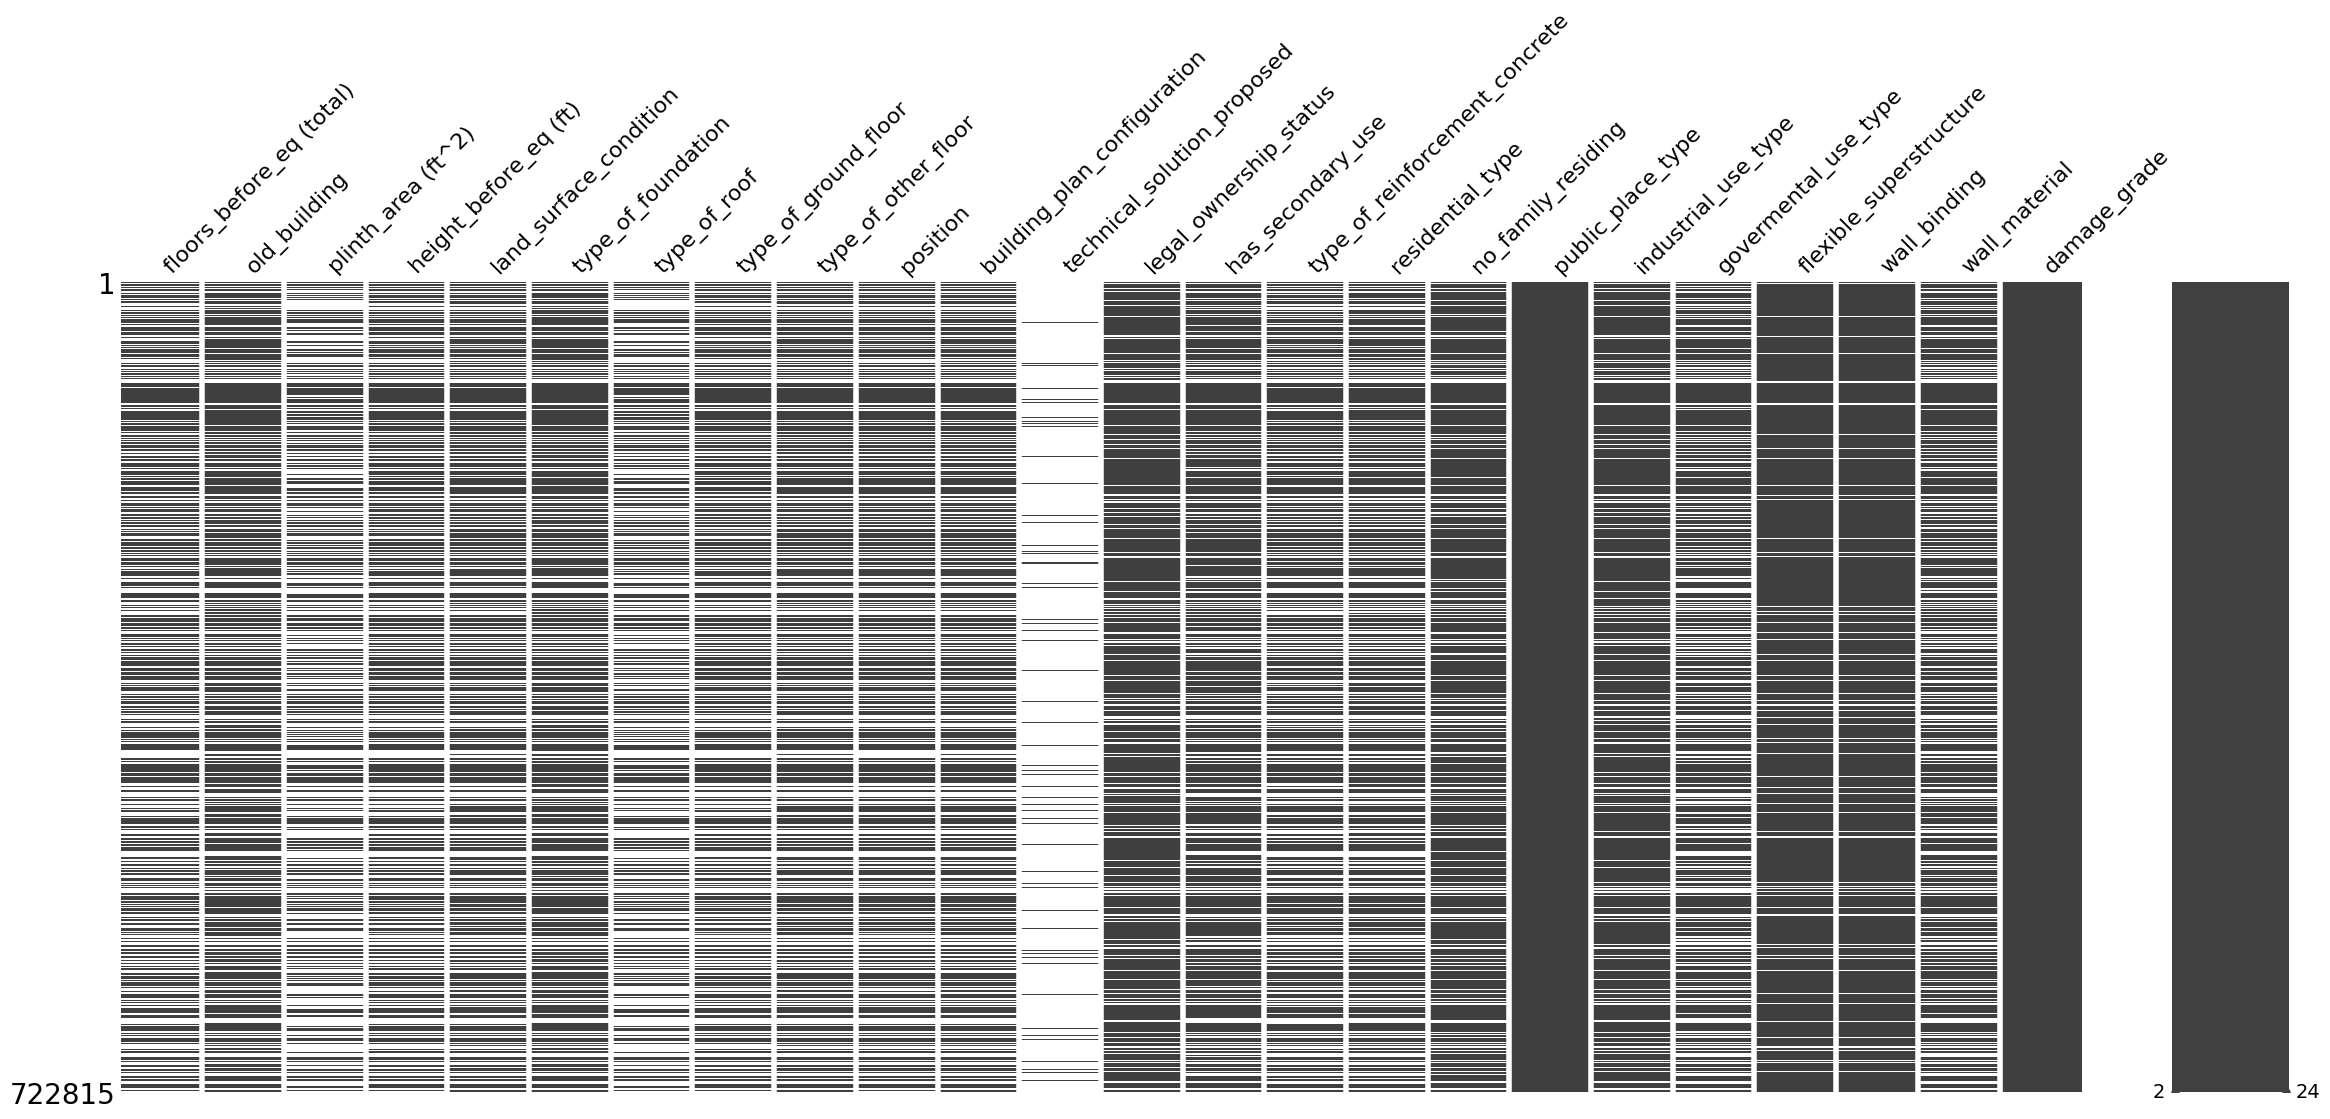

In [21]:
import missingno as msno
msno.matrix(df)

Diantara fitur lainnya, jumlah missing value terbanyak dimiliki oleh technical_solution_proposed

Untuk melihat korelasi antara nilai yang hilang, kita dapat menggunakan heatmap dari missingno

<Axes: >

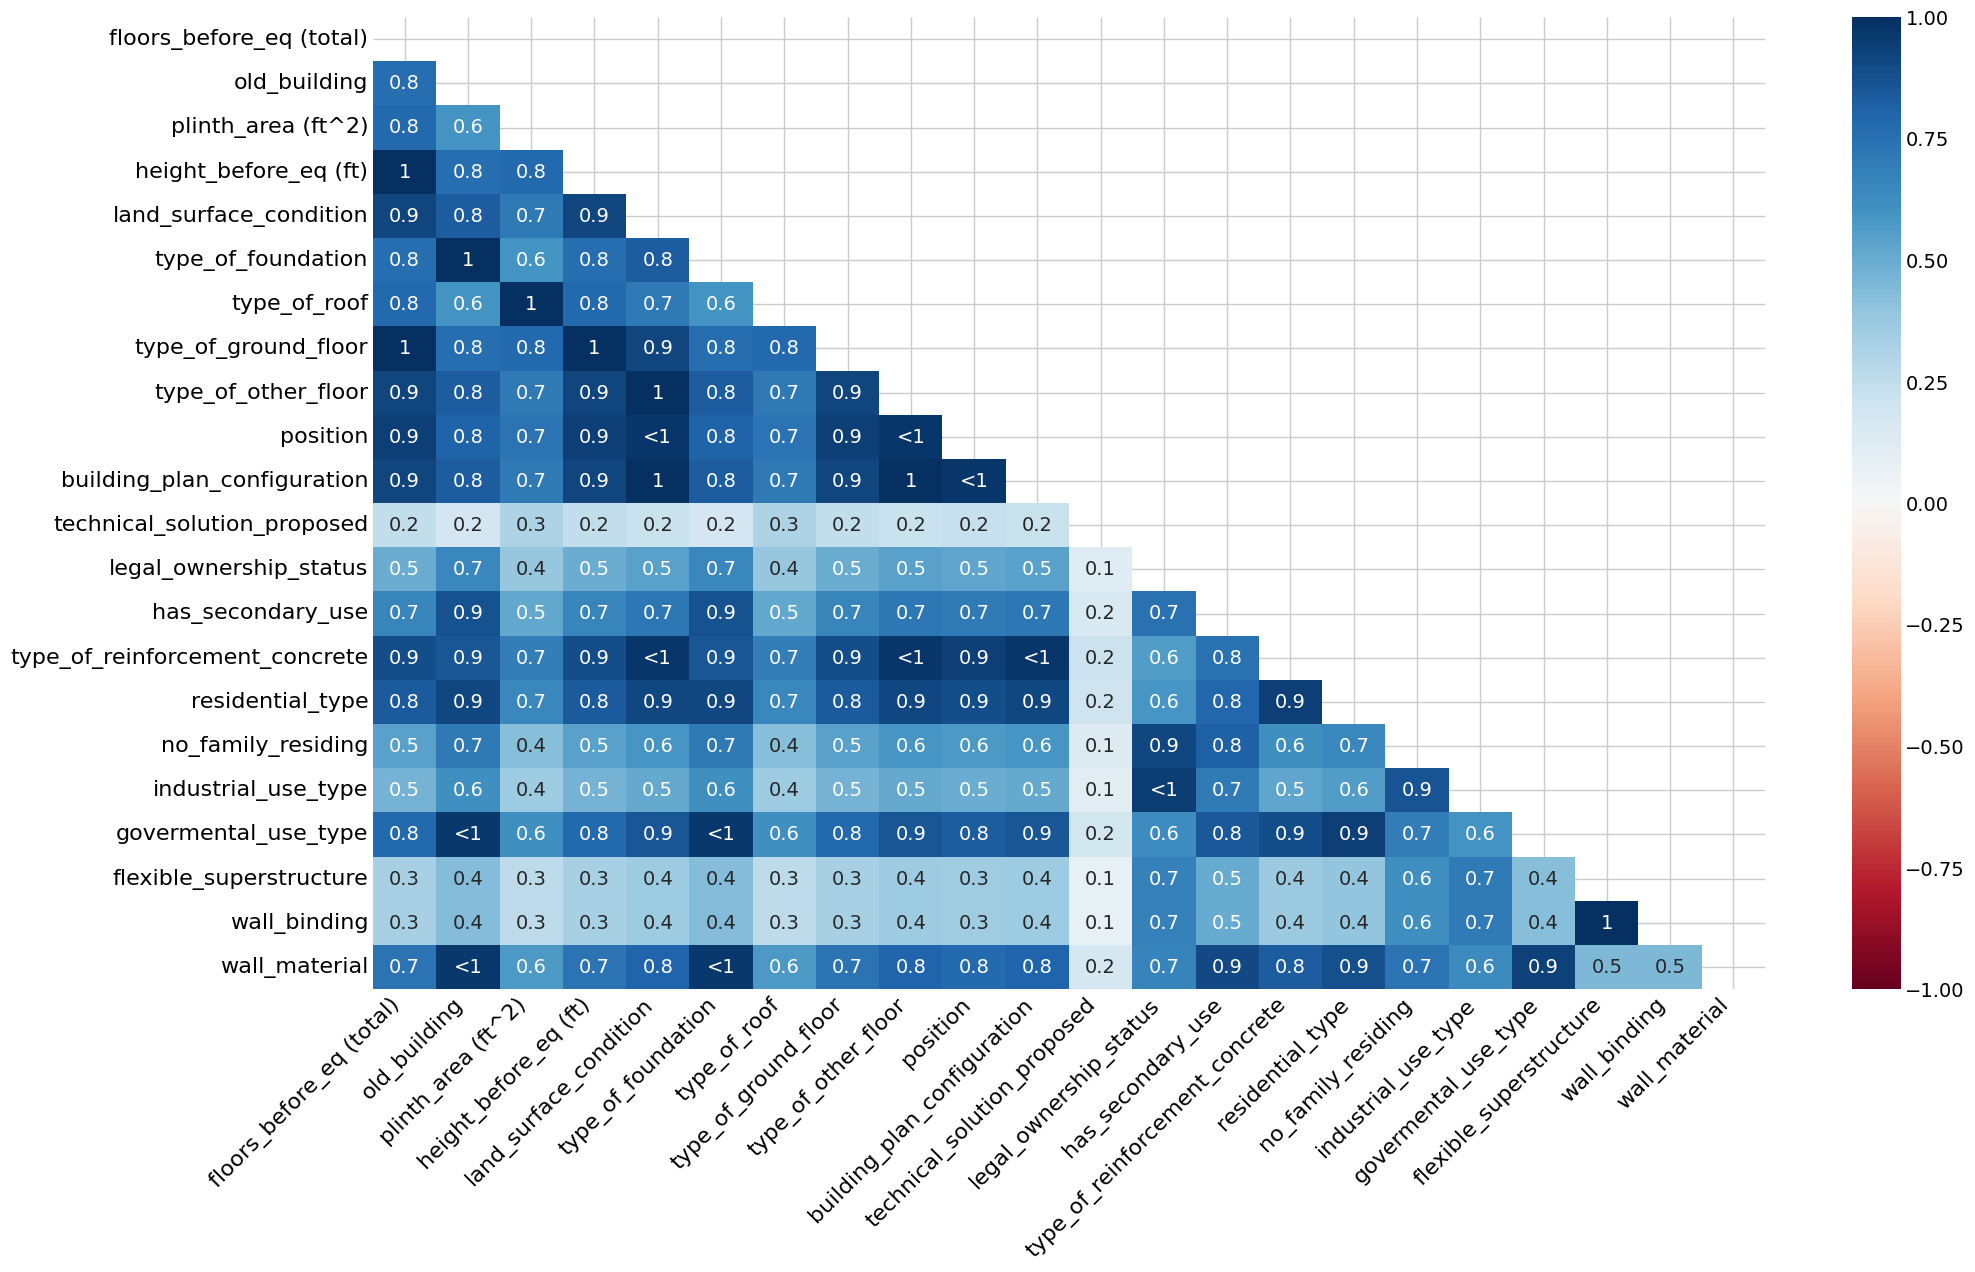

In [22]:
msno.heatmap(df)

Kita dapat melihat bahwa technical_solution_proposed memiliki ketergantungan nilai hilang yang sangat rendah dengan fitur lain. Tidak ada faktor yang dapat membuat kendala untuk pemberian solusi teknis pada bangunan yang rusak, sehingga termasuk kategori Missing Completely At Random (MCAR).

Mari kita lihat lebih lanjut apakah isi technical_solution_proposed sesuai dengan damage grade

In [23]:
solution = df['technical_solution_proposed'].unique()[1:]
solution = ['No need', 'Minor repair', 'Major repair', 'Reconstruction']
list_sol = []
for sol in solution :
    list_sol.append([sol])

count = 0
for sol in solution :
    for damage in range(1,6,1) :
        damage_count = len(df[(df['technical_solution_proposed'] == sol) & (df['damage_grade'] == damage)][['technical_solution_proposed', 'damage_grade']])
        list_sol[count].append(damage_count)
    count += 1

df_sol = pd.DataFrame(list_sol, columns=['Solution','Grade 1','Grade 2','Grade 3', 'Grade 4', 'Grade 5'])

Terlihat beberapa solution tidak sesuai dengan damage, mari kita visualisasikan sehingga dapat terlihat lebih jelas

Text(0.5, 1.0, 'Grade 5')

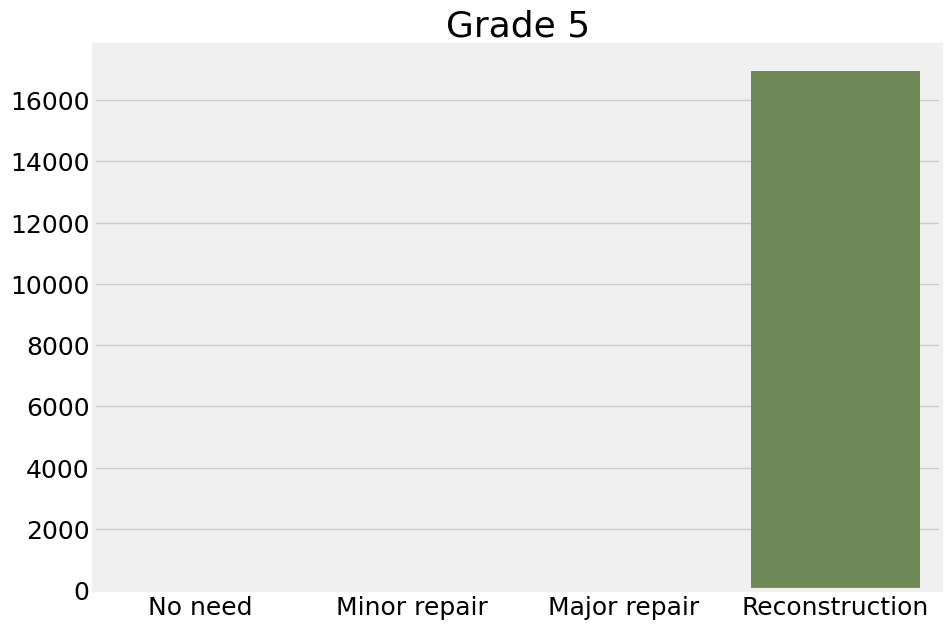

In [86]:
plt.figure(figsize=(36,15))
plt.style.use('fivethirtyeight')
# plt.suptitle('Jumlah Technical Solution Berdasarkan Grade', fontsize=28, x = 0.35)

font = {'size'   : 18}

plt.rcParams['figure.facecolor'] = 'white'

mpl.rc('font', **font)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.2)


# plt.subplot(2,3,1)
# sns.barplot(x=df_sol['Solution'],y=df_sol['Grade 1'])
# plt.xlabel('')
# plt.ylabel('')
# plt.title('Grade 1')

# plt.subplot(2,3,2)
# sns.barplot(x=df_sol['Solution'],y=df_sol['Grade 2'])
# plt.xlabel('')
# plt.ylabel('')
# plt.title('Grade 2')

# plt.subplot(2,3,1)
# sns.barplot(x=df_sol['Solution'],y=df_sol['Grade 3'])
# plt.xlabel('')
# plt.title('Grade 3')
# plt.ylabel('')

# plt.subplot(2,3,2)
# sns.barplot(x=df_sol['Solution'],y=df_sol['Grade 4'])
# plt.xlabel('')
# plt.title('Grade 4')
# plt.ylabel('')

plt.subplot(2,3,5)
sns.barplot(x=df_sol['Solution'],y=df_sol['Grade 5'])
plt.xlabel('')
plt.ylabel('')
plt.title('Grade 5')

Dari visualisasi ini, kita dapat menyimpulkan bahwa sebagian besar dari solusi teknis yang diberikan sesuai dengan tingkat kerusakan bangunan, sehingga kita dapat menambah beberapa pertimbangan dalam EDA dan Modelling :

1. Dikarenakan technical_solution_proposed berpengaruh terhadap variabel target meskipun data akan hanya tersisa 6%, maka modelling akan diujicoba tanpa dan dengan fitur technical_solution_proposed
2. EDA akan dilakukan dengan melakukan drop kolom technical_solution_proposed kemudian melakukan dropna sehingga data yang hilang tidak begitu signifikan. Meskipun fitur tersebut berhubungan dengan grade damage, namun tidak relevan dengan tujuan EDA yaitu menganalisis karakterisitk bangunan yang memiliki tingkat kerusakan kecil

Selanjutnya, kita akan memerika distribusi class apabila dilakukan drop missing value dan tidak

Text(0.5, 1.0, 'Original Data')

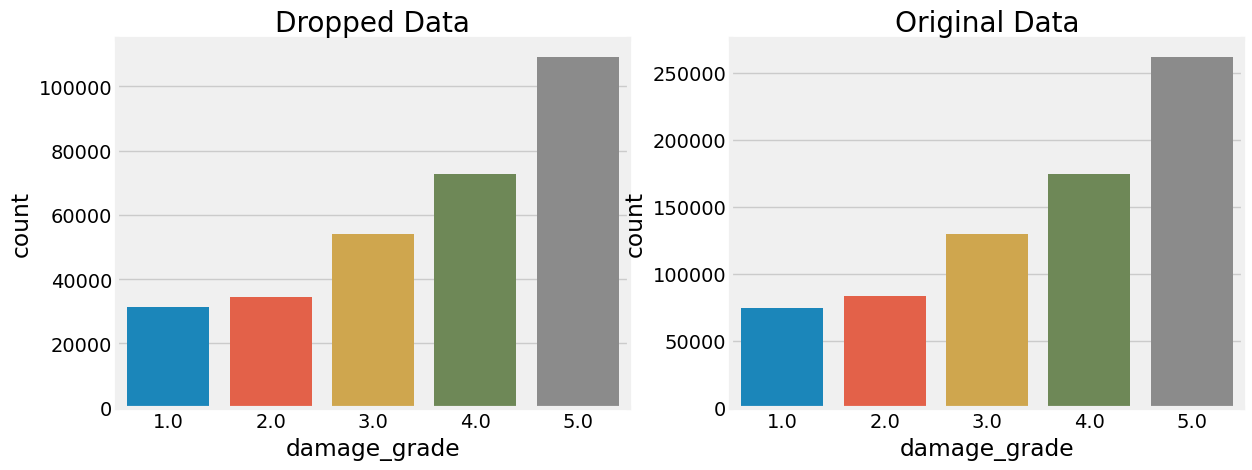

In [25]:
plt.figure(figsize=(20,10))
plt.style.use('fivethirtyeight')
df_dropped_na = df.drop('technical_solution_proposed', axis=1)
df_dropped_na = df_dropped_na.dropna()

plt.subplot(2,3,1)
sns.countplot(x=df_dropped_na['damage_grade'])
plt.title('Dropped Data')

plt.subplot(2,3,2)
sns.countplot(x=df['damage_grade'])
plt.title('Original Data')

Distribuis menunjukkan ketidak seimbangan target variabel pada data. Namun, dikarenakan tidak ada perubahan yang signifikan dari kedua tipe data, oleh karena itu, data yang dilakukan drop akan diprioritaskan

In [26]:
df_duplicate = df.drop('technical_solution_proposed', axis=1)
df_duplicate = df_duplicate.dropna()
df_duplicate = df_duplicate[df_duplicate.duplicated()]

In [27]:
df_dropped_na = df.drop('technical_solution_proposed', axis=1)
df_dropped_na = df_dropped_na.dropna()
df_dropped_na = df_dropped_na.reset_index(drop=True)

Selanjutnya adalah melakukan pembersihan data untuk dilakukan analisis lebih lanjut, pembersihan data pertama tama akan dilakukan pada kolom kategorikal

In [28]:
cat_col = df_dropped_na.select_dtypes(include=('object')).columns.tolist()
df_dropped_na[cat_col].head()

floors_before_eq (total) plinth_area (ft^2) land_surface_condition  \
0                floor two           256 ft^2                   Flat   
1                  Floor 3           985 ft^2                   Flat   
2                      two           185 ft^2                   Flat   
3             just 2 floor           290 ft^2                   Flat   
4   There is 2 Floor/Story           504 ft^2                   Flat   

                   type_of_foundation                          type_of_roof  \
0                    Bamboo or Timber              Bamboo/Timber Light roof   
1  Clay Sand Mixed mortar-Stone/Brick  Wood Light Roof or Bamboo Heavy Roof   
2  Clay Sand Mixed mortar-Stone/Brick  Wood Light Roof or Bamboo Light Roof   
3  Clay Sand Mixed mortar-Stone/Brick           Bamboo or Timber Light roof   
4             Clay mortar-Stone/Brick              Bamboo/Timber Light roof   

  type_of_ground_floor       type_of_other_floor      position  \
0                 Clay         TImber/Bamboo-Mud  Not attached   
1                 Clay         TImber/Bamboo-Mud  Not attached   
2                 Clay         TImber/Bamboo-Mud  Not attached   
3                 Clay  Timber Mud or Bamboo-Mud  Not attached   
4                 Clay         TImber/Bamboo-Mud  Not attached   

  building_plan_configuration legal_ownership_status residential_type  \
0                 Rectangular            Private Use  Non-residential   
1                      Square                Private  Non-residential   
2                 Rectangular                Private  Non-residential   
3                 Rectangular                Private  Non-residential   
4                 Rectangular            Private Use  Non-residential   

  no_family_residing public_place_type industrial_use_type  \
0                1.0        Non-public      Non-industrial   
1                1.0        Non-public      Non-industrial   
2                1.0        Non-public      Non-industrial   
3                1.0        Non-public      Non-industrial   
4                1.0        Non-public      Non-industrial   

  govermental_use_type flexible_superstructure  
0      Non-govermental             unavailable  
1      Non-govermental             unavailable  
2      Non-govermental             unavailable  
3      Non-govermental             unavailable  
4      Non-govermental             unavailable

In [29]:
for col in cat_col :
    print(col,':',df_dropped_na[col].nunique())

floors_before_eq (total) : 47
plinth_area (ft^2) : 930
land_surface_condition : 3
type_of_foundation : 12
type_of_roof : 12
type_of_ground_floor : 15
type_of_other_floor : 11
position : 4
building_plan_configuration : 10
legal_ownership_status : 13
residential_type : 6
no_family_residing : 11
public_place_type : 13
industrial_use_type : 9
govermental_use_type : 3
flexible_superstructure : 2


Mari kita melihat lebih lanjut nilai dari setiap fitur

In [30]:
for col in [col for col in cat_col if 'plinth_area (ft^2)' not in cat_col]:
    print(col,':',df_dropped_na[col].unique().tolist(),'\n')

Beberapa fitur memiliki nilai problematik dengan delimiter dan case yang berbeda beda :
1. floors_before_eq (total)
2. type_of_foundation
3. type_of_roof
4. type_of_ground_floor
5. type_of_other_floor
6. legal_ownership_status

Pertama yang akan dibersihkan adalah fitur floors_before_eq, nilai teks akan diubah menjadi angka

In [31]:
def transform_floors_before_eq(value):
    if isinstance(value, str):
        value = value.lower()
        if any(x in value for x in ['one','first','1']) :
            return 1
        elif any(x in value for x in ['two','second','2']) :
            return 2
        elif any(x in value for x in ['three','third','3','3.00']) :
            return 3
        elif any (x in value for x in ['four','fourth','4']) :
            return 4
        elif any (x in value for x in ['five','fifth','5']) :
            return 5
        else :
            return value
    else :
        return value


df_dropped_na['floors_before_eq (total)'] = df_dropped_na['floors_before_eq (total)'].apply(lambda x : transform_floors_before_eq(x))
df_dropped_na['floors_before_eq (total)'].head()

0    2
1    3
2    2
3    2
4    2
Name: floors_before_eq (total), dtype: object

Kemudian, kita melakukan pembersihan pada type_x

In [32]:
df_dropped_na['type_of_foundation'].unique()

array(['Bamboo or Timber', 'Clay Sand Mixed mortar-Stone/Brick',
       'Clay mortar-Stone/Brick', 'Reinforced Concrete',
       'Cement-Stone or Cement-Brick', 'Mud mortar-Stone/Brick',
       'Bamboo/TImber', 'Bamboo/Timber', 'RC', 'Others',
       'Cement-Stone/Brick', 'Other'], dtype=object)

In [33]:
df_dropped_na['type_of_foundation'] = df_dropped_na['type_of_foundation'].replace({
    'Cement-Stone or Cement-Brick' : 'Cement-Stone/Brick',
    'Bamboo or Timber' : 'Bamboo/Timber',
    'RC' : 'Reinforced Concrete',
    'Bamboo/TImber' : 'Bamboo/Timber',
    'Others' : 'Other'
    })

df_dropped_na['type_of_foundation'].unique()

array(['Bamboo/Timber', 'Clay Sand Mixed mortar-Stone/Brick',
       'Clay mortar-Stone/Brick', 'Reinforced Concrete',
       'Cement-Stone/Brick', 'Mud mortar-Stone/Brick', 'Other'],
      dtype=object)

In [34]:
df_dropped_na['type_of_roof'].unique()

array(['Bamboo/Timber Light roof', 'Wood Light Roof or Bamboo Heavy Roof',
       'Wood Light Roof or Bamboo Light Roof',
       'Bamboo or Timber Light roof', 'Bamboo/TImber-Light Roof',
       'Reinforced Brick Slab/rcc/rbc', 'Bamboo/Timber Heavy roof',
       'reinforced cement concrete/rb/rbc', 'Bamboo or Timber Heavy roof',
       'Bamboo/TImber-Heavy Roof', 'rcc/rb/rbc',
       'Reinforced brick concrete/rcc/rbc'], dtype=object)

In [35]:
df_dropped_na['type_of_roof'] = df_dropped_na['type_of_roof'].replace({
    'Bamboo or Timber-Light roof' : 'Bamboo/Timber Light roof',
    'Bamboo or Timber Light roof' : 'Bamboo/Timber Light roof',
    'Bamboo or Timber Heavy roof' : 'Bamboo/Timber Heavy roof',
    'Wood Light Roof or Bamboo Light Roof' : 'Wood Light roof/Bamboo Light roof',
    'Wood Light Roof or Bamboo Heavy Roof' : 'Wood Light roof/Bamboo Heavy roof',
    'Bamboo/TImber-Light Roof' : 'Bamboo/Timber Light roof',
    'reinforced cement concrete/rb/rbc' : 'rcc/rb/rbc',
    'Reinforced Brick Slab/rcc/rbc' : 'rbs/rcc/rbc',
    'Bamboo/TImber-Heavy Roof' : 'Bamboo/Timber Heavy roof',
    'Bamboo or Timber Heavy Roof' : 'Bamboo/Timber Heavy roof',
    'Reinforced brick concrete/rcc/rbc' : 'rb/rbc'
})

df_dropped_na['type_of_roof'].unique()

array(['Bamboo/Timber Light roof', 'Wood Light roof/Bamboo Heavy roof',
       'Wood Light roof/Bamboo Light roof', 'rbs/rcc/rbc',
       'Bamboo/Timber Heavy roof', 'rcc/rb/rbc', 'rb/rbc'], dtype=object)

In [36]:
df_dropped_na['type_of_ground_floor'].unique()

array(['Clay', 'Mud', 'Reinforced Concrete', 'mud', 'reinforced concrete',
       'Brick or Stone', 'RC', 'soil, water, loam Mixed', 'brick/stone',
       'Other', 'Lumber', 'Brick/Stone', 'TImber', 'Timber', 'Wood'],
      dtype=object)

In [37]:
df_dropped_na['type_of_ground_floor'] = df_dropped_na['type_of_ground_floor'].replace({
    'mud' : 'Mud',
    'Brick or Stone' : 'Brick/Stone',
    'reinforced concrete' : 'Reinforced Concrete',
    'RC' : 'Reinforced Concrete',
    'brick/stone' : 'Brick/Stone',
    'TImber' : 'Timber'
})

df_dropped_na['type_of_ground_floor'].unique()

array(['Clay', 'Mud', 'Reinforced Concrete', 'Brick/Stone',
       'soil, water, loam Mixed', 'Other', 'Lumber', 'Timber', 'Wood'],
      dtype=object)

In [38]:
df_dropped_na['type_of_other_floor'].unique()

array(['TImber/Bamboo-Mud', 'Timber Mud or Bamboo-Mud', 'Not applicable',
       'Wood or Bamboo Mud', 'rcc/rb/rbc', 'Wood-Plank', 'Timber-Planck',
       'Lumber-plank', 'Wood-Mud or Bamboo Mud',
       'Reinforced brick concrete/rcc/rbc',
       'reinforced cement concrete/rb/rbc'], dtype=object)

In [39]:
df_dropped_na['type_of_other_floor'] = df_dropped_na['type_of_other_floor'].replace({
    'Timber-Planck' : 'Timber-Plank',
    'TImber/Bamboo-Mud' : 'Timber/Bamboo-Mud',
    'Timber Mud or Bamboo-Mud' : 'Timber Mud/Bamboo-Mud',
    'Wood or Bamboo Mud' : 'Wood/Bamboo-Mud',
    'Wood-Mud or Bamboo Mud' : 'Wood-Mud/Bamboo Mud',
    'Reinforced brick concrete/rcc/rbc' : 'rcc/rbc',
    'reinforced cement concrete/rb/rbc' : 'rcc/rb/rbc'
})

df_dropped_na['type_of_other_floor'].unique()

array(['Timber/Bamboo-Mud', 'Timber Mud/Bamboo-Mud', 'Not applicable',
       'Wood/Bamboo-Mud', 'rcc/rb/rbc', 'Wood-Plank', 'Timber-Plank',
       'Lumber-plank', 'Wood-Mud/Bamboo Mud', 'rcc/rbc'], dtype=object)

Kemudian, dilakukan pembersihan pada legal_ownership_status dan plinth_area

In [40]:
def transform_use(x) :
    if x == 'Private Use' or x == 'Private' or x == 'Prvt' or x == 'Privste' :
        return 'private'
    elif x == 'Public' or x =='Public Space' or x == 'Public Use' :
        return 'public'
    elif x == 'Unknown' or x == 'Unspecified' or x == 'Other' :
        return 'other'
    elif x == 'Institutional Use' or x == 'Institutionals' or x == 'Institutional' :
        return 'institutional'

df_dropped_na['legal_ownership_status'] = df_dropped_na['legal_ownership_status'].apply(lambda x : transform_use(x))

In [41]:
df_dropped_na['plinth_area (ft^2)'] = df_dropped_na['plinth_area (ft^2)'].apply(lambda x : x.split(" ")[0] if x != "More than 1000 ft^2" else x.split(" ")[-2])
df_dropped_na['plinth_area (ft^2)'] = pd.to_numeric(df_dropped_na['plinth_area (ft^2)'])

Setelah melakukan berbagai pembersihan, selanjutnya kita akan melakukan EDA

# EDA

Pertama, mari kita analisis bahan bahan yang digunakan untuk bangunan

In [42]:
# Berikut adalah preprocessor dataframe, comment fungsi atau potongan kode jika tidak diperlukan
# Tahap preprocessing yang menggunakan lambda akan error jika masih ada nan value, jadi urutkan sesuai kebutuhan

def preprocessor_for_eda(df) :

    # Drop Technical Solution
    df = df.drop('technical_solution_proposed', axis=1)

    # Drop Nan Values
    df = df.dropna()

    # Preprocessing Kolom floors_before_eq
    df['floors_before_eq (total)'] = df['floors_before_eq (total)'].apply(lambda x : transform_floors_before_eq(x))
    df['floors_before_eq (total)'] = df['floors_before_eq (total)'].astype('int64')
    
    # Preprocessing Kolom type_of_foundation
    df['type_of_foundation'] = df['type_of_foundation'].replace({
    'Cement-Stone or Cement-Brick' : 'Cement-Stone/Brick',
    'Bamboo or Timber' : 'Bamboo/Timber',
    'RC' : 'Reinforced Concrete',
    'Bamboo/TImber' : 'Bamboo/Timber',
    'Others' : 'Other'
    })
    
    # Preprocessing Kolom type_of_foundation
    df['type_of_roof'] = df['type_of_roof'].replace({
    'Bamboo or Timber-Light roof' : 'Bamboo/Timber Light roof',
    'Bamboo or Timber Light roof' : 'Bamboo/Timber Light roof',
    'Bamboo or Timber Heavy roof' : 'Bamboo/Timber Heavy roof',
    'Wood Light Roof or Bamboo Light Roof' : 'Wood Light roof/Bamboo Light roof',
    'Wood Light Roof or Bamboo Heavy Roof' : 'Wood Light roof/Bamboo Heavy roof',
    'Bamboo/TImber-Light Roof' : 'Bamboo/Timber Light roof',
    'reinforced cement concrete/rb/rbc' : 'rcc/rb/rbc',
    'Reinforced Brick Slab/rcc/rbc' : 'rbs/rcc/rbc',
    'Bamboo/TImber-Heavy Roof' : 'Bamboo/Timber Heavy roof',
    'Bamboo or Timber Heavy Roof' : 'Bamboo/Timber Heavy roof',
    'Reinforced brick concrete/rcc/rbc' : 'rb/rbc'
    })

    # Preprocessing Kolom type_of_ground_floor
    df['type_of_ground_floor'] = df['type_of_ground_floor'].replace({
    'mud' : 'Mud',
    'Brick or Stone' : 'Brick/Stone',
    'reinforced concrete' : 'Reinforced Concrete',
    'RC' : 'Reinforced Concrete',
    'brick/stone' : 'Brick/Stone',
    'TImber' : 'Timber'
    })

    # Preprocessing Kolom type_of_other_floor
    df['type_of_other_floor'] = df['type_of_other_floor'].replace({
    'Timber-Planck' : 'Timber-Plank',
    'TImber/Bamboo-Mud' : 'Timber/Bamboo-Mud',
    'Timber Mud or Bamboo-Mud' : 'Timber Mud/Bamboo-Mud',
    'Wood or Bamboo Mud' : 'Wood/Bamboo-Mud',
    'Wood-Mud or Bamboo Mud' : 'Wood-Mud/Bamboo Mud',
    'Reinforced brick concrete/rcc/rbc' : 'rcc/rbc',
    'reinforced cement concrete/rb/rbc' : 'rcc/rb/rbc'
    })

    # Preprocessing Kolom legal_ownership_status
    df['legal_ownership_status'] = df['legal_ownership_status'].apply(lambda x : transform_use(x))

    # Preprocessing Kolom plinth_area (ft^2)
    df['plinth_area (ft^2)'] = df['plinth_area (ft^2)'].apply(lambda x : x.split(" ")[0] if x != "More than 1000 ft^2" else x.split(" ")[-2])
    df['plinth_area (ft^2)'] = pd.to_numeric(df['plinth_area (ft^2)'])

    # Preprocessing Kolom public_place_type
    df['public_place_type'] = df['public_place_type'].apply(lambda x : 'Public' if x != 'Non-public' else x)
    
    return df


In [43]:
df_tmp = df.copy()
df_dropped_na = preprocessor_for_eda(df_tmp)

<Axes: xlabel='land_surface_condition', ylabel='count'>

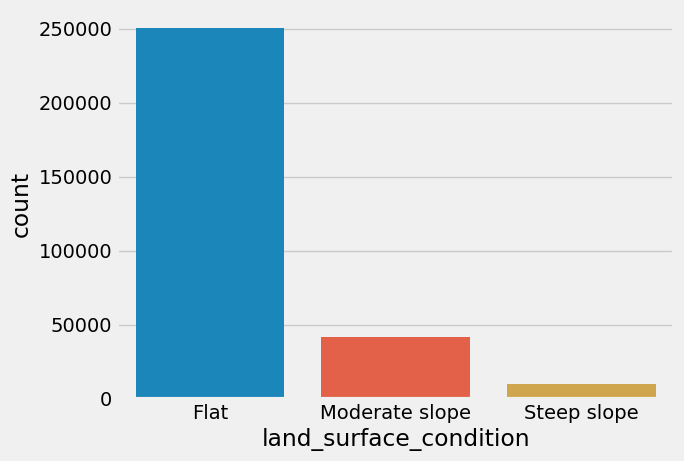

In [44]:
sns.countplot(x = df_dropped_na['land_surface_condition'])

<Axes: xlabel='public_place_type', ylabel='count'>

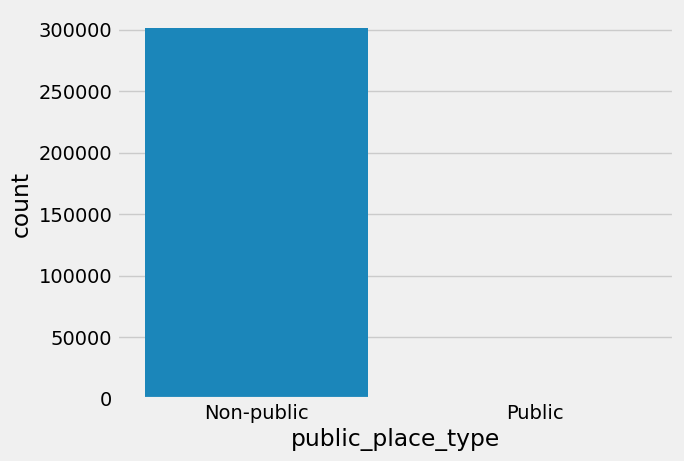

In [45]:
sns.countplot(x = df_dropped_na['public_place_type'])

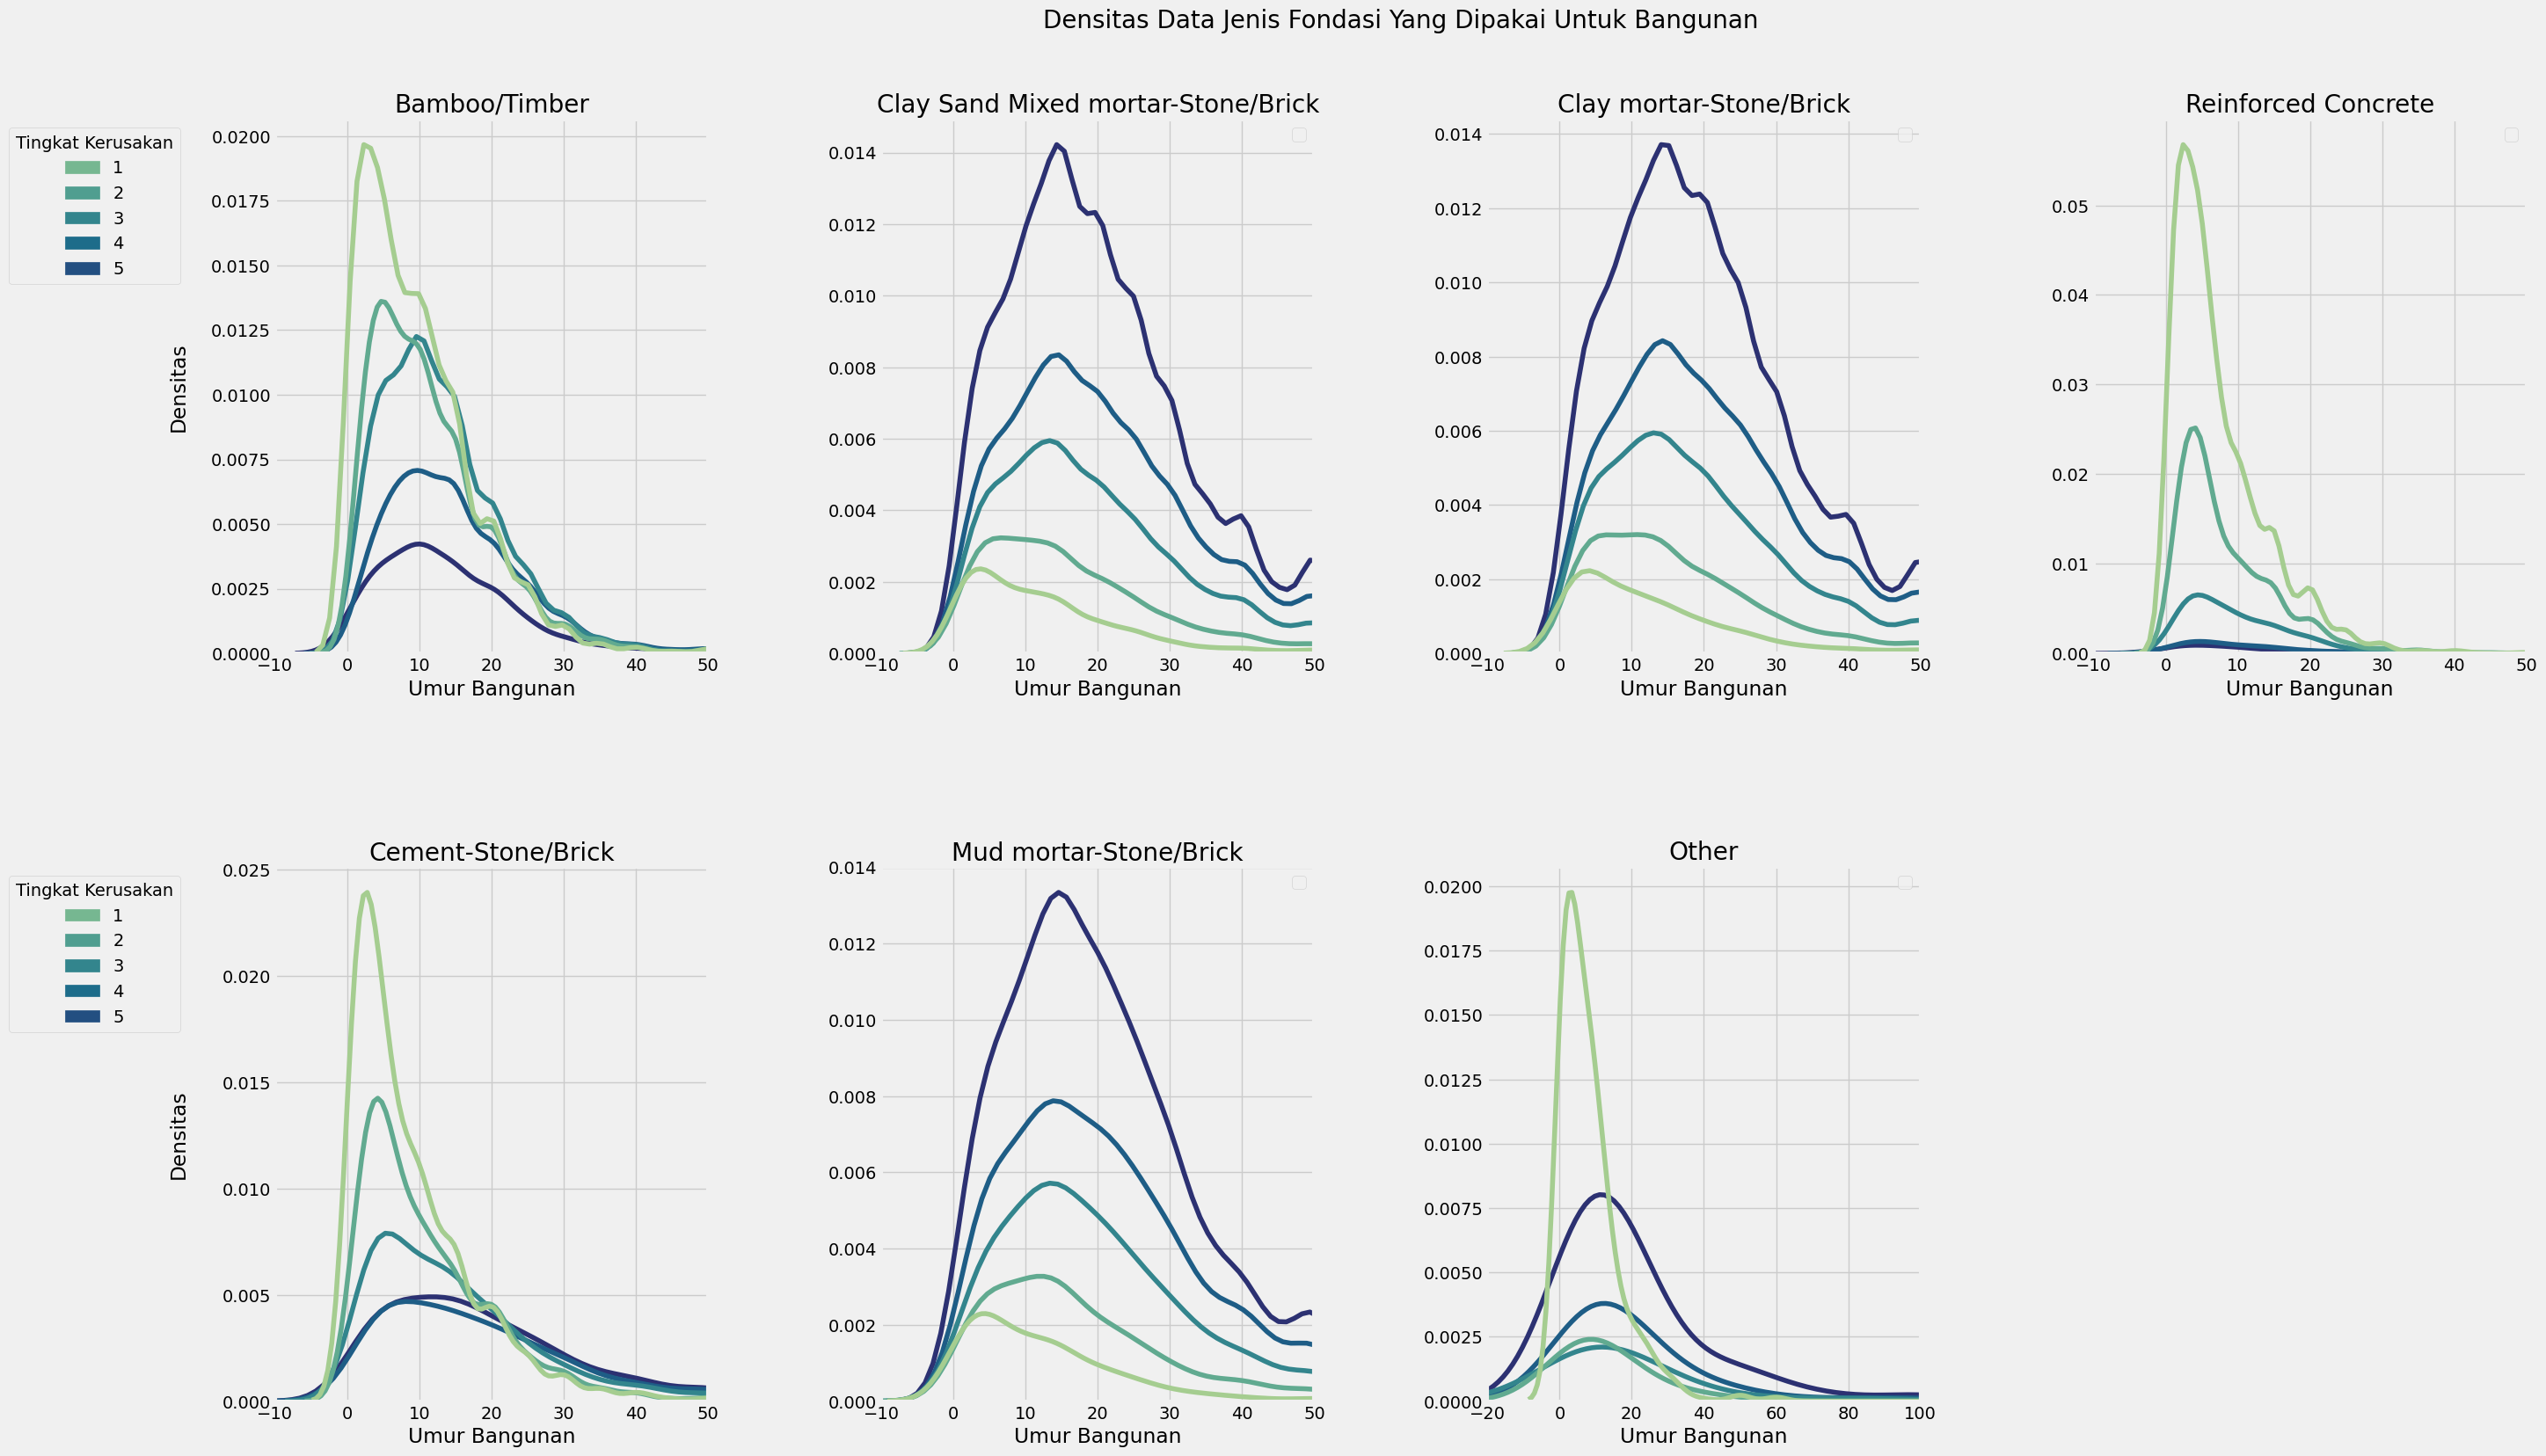

In [46]:
import matplotlib as mpl

fig = plt.figure(figsize=(32,18))

fig.suptitle('Densitas Data Jenis Fondasi Yang Dipakai Untuk Bangunan', fontsize=20)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.91,
                    wspace=0.4,
                    hspace=0.4)

plt.subplot(2,4,1)
df_bamboo = df_dropped_na[df_dropped_na['type_of_foundation'] == 'Bamboo/Timber']
df_bamboo = df_bamboo[df_bamboo['old_building']!=999]
colors = sns.color_palette('crest', n_colors=5)[::-1]
handles = []
labels = [] 
ax = sns.kdeplot(x = df_bamboo['old_building'], hue=df_bamboo['damage_grade'], palette='crest')
for dg, color in zip(df_bamboo['damage_grade'].unique(), colors):
    handles.append(mpl.patches.Patch(color=color))
    labels.append(dg)
plt.xlim(-10,50)
plt.title('Bamboo/Timber')
plt.xlabel('Umur Bangunan')
plt.ylabel('Densitas')
ax.legend(handles=handles[::-1], labels=['1','2','3','4','5'], 
           loc='upper right', bbox_to_anchor=(-0.2, 1),
           title='Tingkat Kerusakan')
ax.yaxis.set_label_coords(-.2,.5)

plt.subplot(2,4,2)
df_bamboo = df_dropped_na[df_dropped_na['type_of_foundation'] == 'Clay Sand Mixed mortar-Stone/Brick']
df_bamboo = df_bamboo[df_bamboo['old_building']!=999]
sns.kdeplot(x = df_bamboo['old_building'], hue=df_bamboo['damage_grade'], palette='crest')
plt.xlim(-10,50)
plt.title('Clay Sand Mixed mortar-Stone/Brick')
plt.xlabel('Umur Bangunan')
plt.ylabel('')
plt.legend('')

plt.subplot(2,4,3)
df_bamboo = df_dropped_na[df_dropped_na['type_of_foundation'] == 'Clay mortar-Stone/Brick']
df_bamboo = df_bamboo[df_bamboo['old_building']!=999]
sns.kdeplot(x = df_bamboo['old_building'], hue=df_bamboo['damage_grade'], palette='crest')
plt.xlim(-10,50)
plt.title('Clay mortar-Stone/Brick')
plt.xlabel('Umur Bangunan')
plt.ylabel('')
plt.legend('')

plt.subplot(2,4,4)
df_bamboo = df_dropped_na[df_dropped_na['type_of_foundation'] == 'Reinforced Concrete']
df_bamboo = df_bamboo[df_bamboo['old_building']!=999]
sns.kdeplot(x = df_bamboo['old_building'], hue=df_bamboo['damage_grade'], palette='crest')
plt.xlim(-10,50)
plt.title('Reinforced Concrete')
plt.xlabel('Umur Bangunan')
plt.ylabel('')
plt.legend('')

plt.subplot(2,4,5)
df_bamboo = df_dropped_na[df_dropped_na['type_of_foundation'] == 'Cement-Stone/Brick']
df_bamboo = df_bamboo[df_bamboo['old_building']!=999]
colors = sns.color_palette('crest', n_colors=5)[::-1]
handles = []
labels = [] 
ax = sns.kdeplot(x = df_bamboo['old_building'], hue=df_bamboo['damage_grade'], palette='crest')
for dg, color in zip(df_bamboo['damage_grade'].unique(), colors):
    handles.append(mpl.patches.Patch(color=color))
    labels.append(dg)
plt.xlim(-10,50)
plt.title('Cement-Stone/Brick')
plt.xlabel('Umur Bangunan')
plt.ylabel('Densitas')
ax.legend(handles=handles[::-1], labels=['1','2','3','4','5'], 
           loc='upper right', bbox_to_anchor=(-0.2, 1),
           title='Tingkat Kerusakan')
ax.yaxis.set_label_coords(-.2,.5)

plt.subplot(2,4,6)
df_bamboo = df_dropped_na[df_dropped_na['type_of_foundation'] == 'Mud mortar-Stone/Brick']
df_bamboo = df_bamboo[df_bamboo['old_building']!=999]
sns.kdeplot(x = df_bamboo['old_building'], hue=df_bamboo['damage_grade'], palette='crest')
plt.xlim(-10,50)
plt.title('Mud mortar-Stone/Brick')
plt.xlabel('Umur Bangunan')
plt.ylabel('')
plt.legend('')

plt.subplot(2,4,7)
df_bamboo = df_dropped_na[df_dropped_na['type_of_foundation'] == 'Other']
df_bamboo = df_bamboo[df_bamboo['old_building']!=999]
sns.kdeplot(x = df_bamboo['old_building'], hue=df_bamboo['damage_grade'], palette='crest')
plt.xlim(-20,100)
plt.title('Other')
plt.xlabel('Umur Bangunan')
plt.ylabel('')
plt.legend('')

Dalam 50 tahun pertama setelah dibangun, terdapat asosiasi pondasi bertipe Bamboo/Timber, Reinforced Concrete, Cement-Stone/Brick, serta Other dengan tingkat kerusakan yang rendah pada. Sedangkan Clay Sand Mixed mortar-Stone/Brick, Clay mortar-Stone/Brick, dan Mud mortar-Stone/Brick memiliki asosiasi dengan tingkat kerusakan yang tinggi, bahkan pada 20 tahun pertama. Di setiap tipe pondasi kerusakan tinggi, terdapat bahan mortar-Stone/Brick di dalamnya

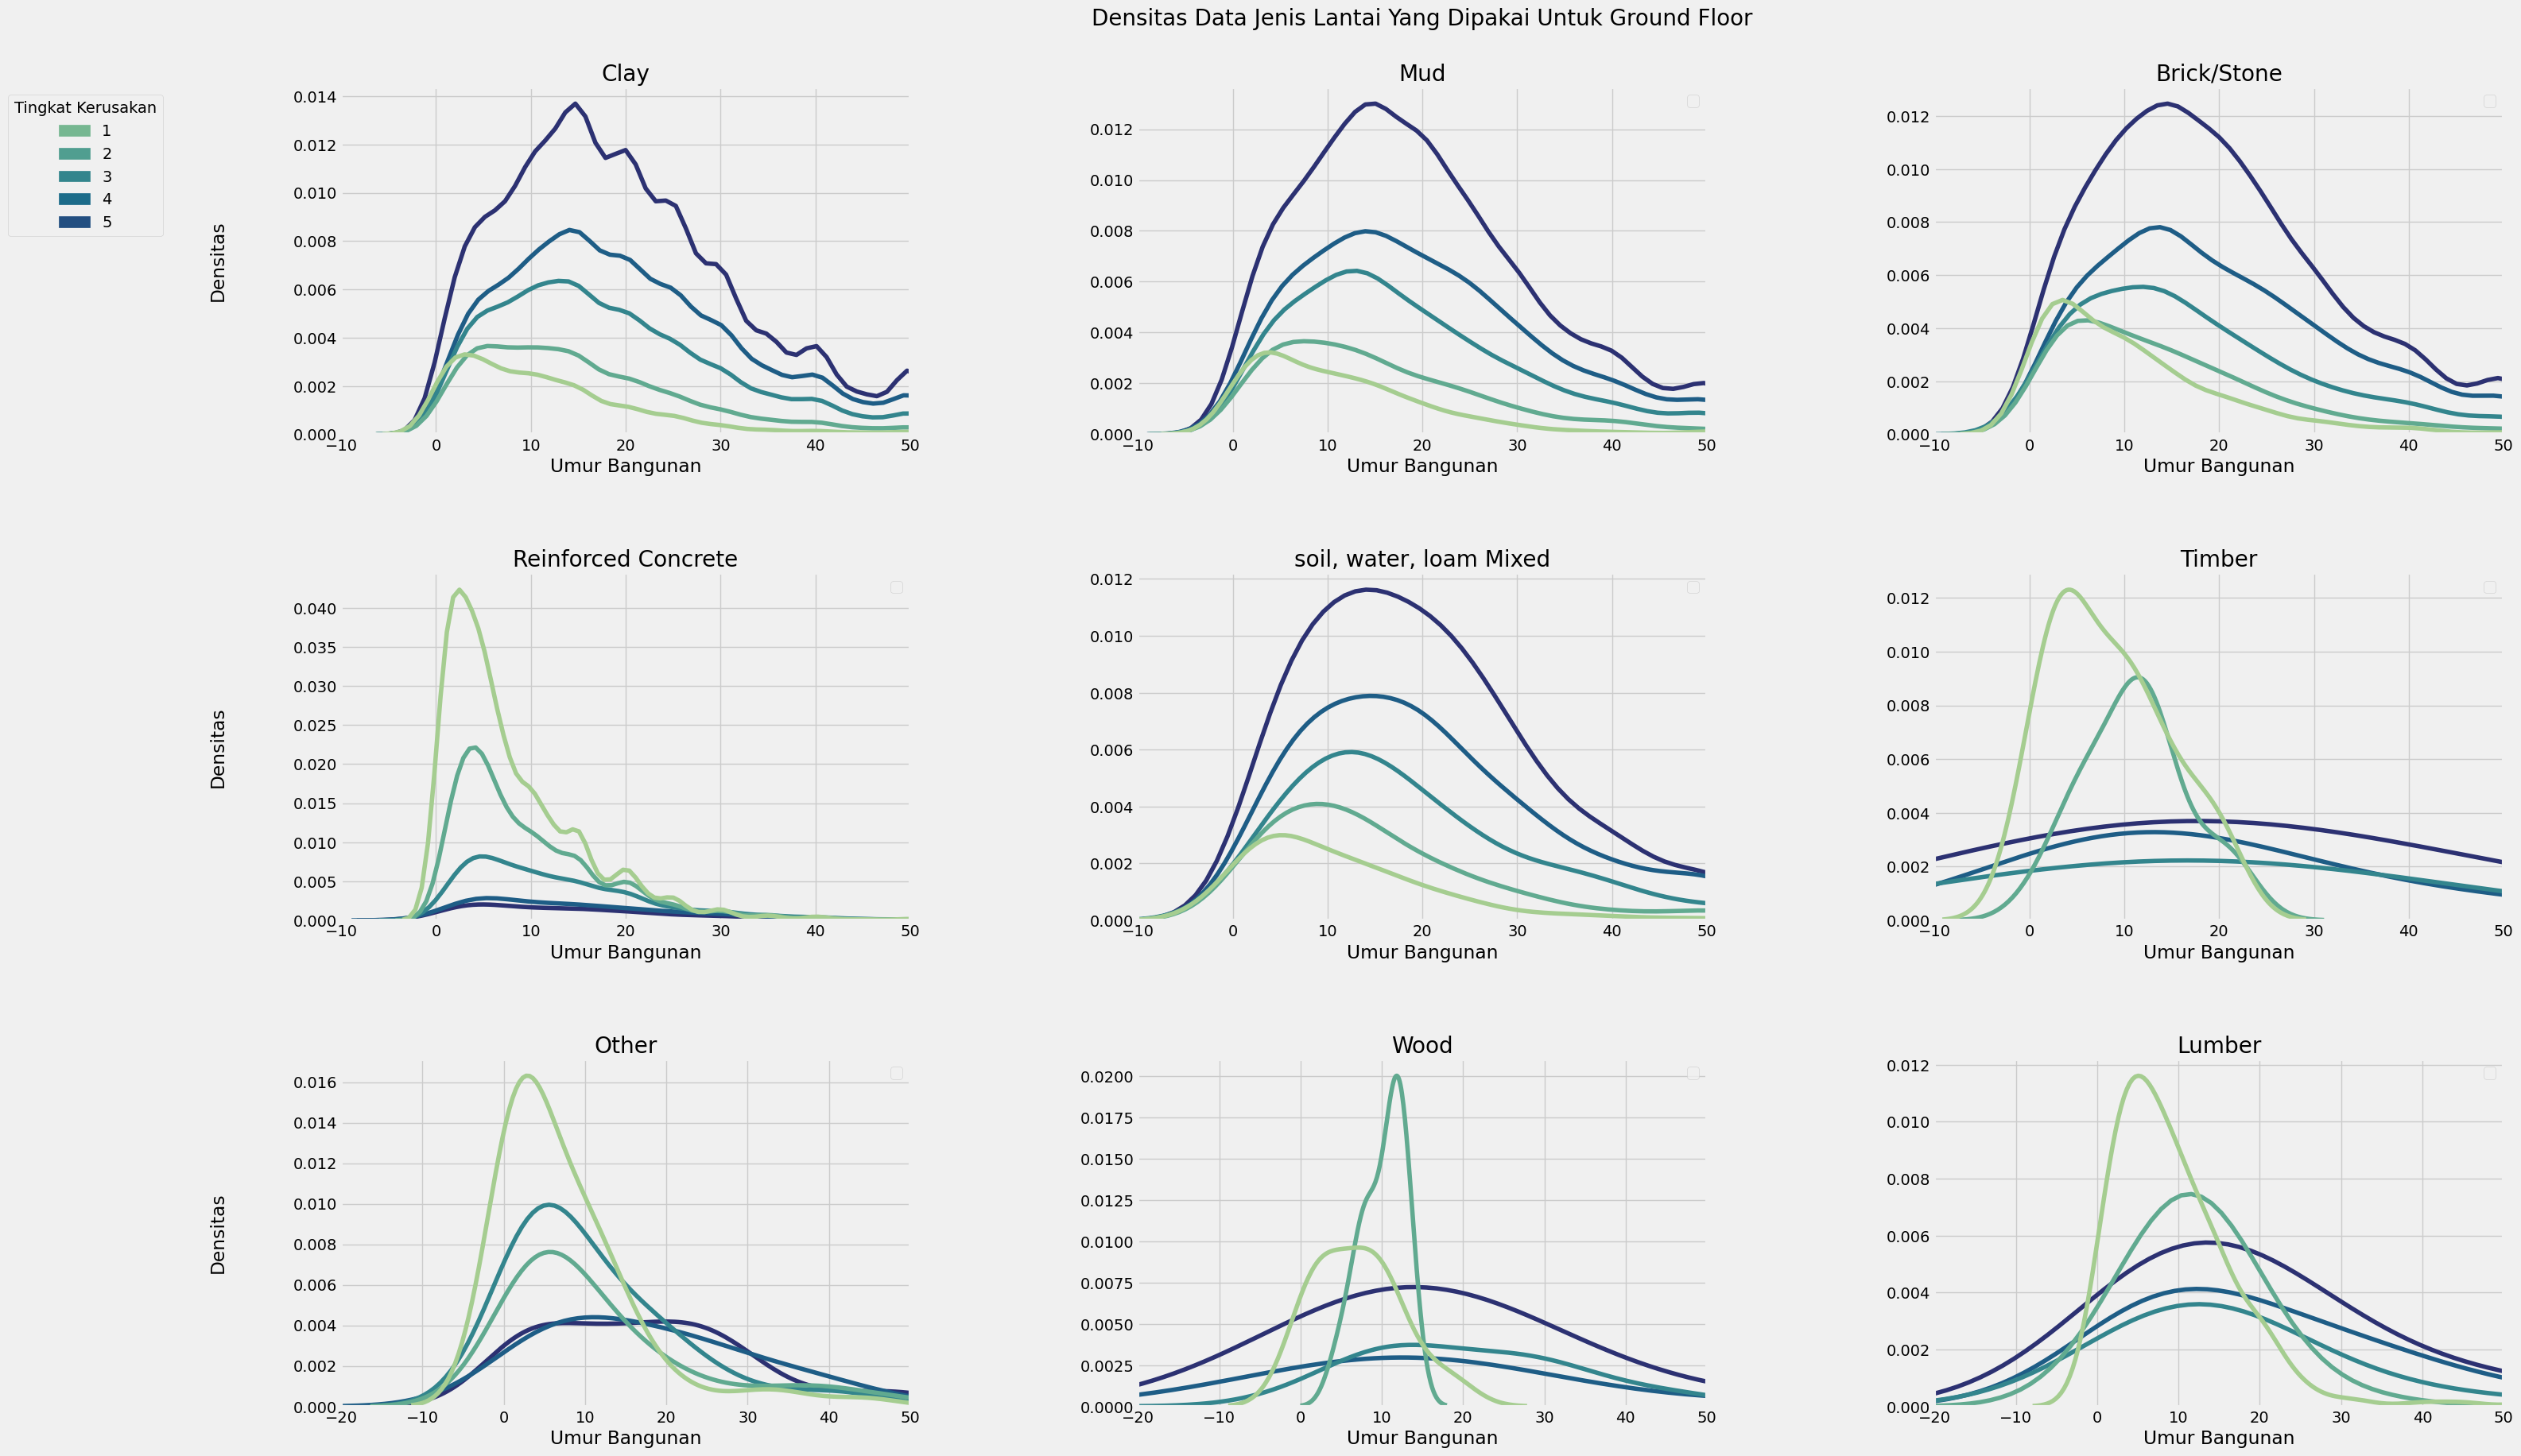

In [47]:
import matplotlib as mpl

fig = plt.figure(figsize=(34,20))

fig.suptitle('Densitas Data Jenis Lantai Yang Dipakai Untuk Ground Floor', fontsize=20)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.93,
                    wspace=0.4,
                    hspace=0.4)

plt.subplot(3,3,1)
df_bamboo = df_dropped_na[df_dropped_na['type_of_ground_floor'] == 'Clay']
df_bamboo = df_bamboo[df_bamboo['old_building']!=999]
colors = sns.color_palette('crest', n_colors=5)[::-1]
handles = []
labels = [] 
ax = sns.kdeplot(x = df_bamboo['old_building'], hue=df_bamboo['damage_grade'], palette='crest')
for dg, color in zip(df_bamboo['damage_grade'].unique(), colors):
    handles.append(mpl.patches.Patch(color=color))
    labels.append(dg)
plt.xlim(-10,50)
plt.title('Clay')
plt.xlabel('Umur Bangunan')
plt.ylabel('Densitas')
ax.legend(handles=handles[::-1], labels=['1','2','3','4','5'], 
           loc='upper right', bbox_to_anchor=(-0.3, 1),
           title='Tingkat Kerusakan')
ax.yaxis.set_label_coords(-.2,.5)

plt.subplot(3,3,2)
df_bamboo = df_dropped_na[df_dropped_na['type_of_ground_floor'] == 'Mud']
df_bamboo = df_bamboo[df_bamboo['old_building']!=999]
sns.kdeplot(x = df_bamboo['old_building'], hue=df_bamboo['damage_grade'], palette='crest')
plt.xlim(-10,50)
plt.title('Mud')
plt.xlabel('Umur Bangunan')
plt.ylabel('')
plt.legend('')

plt.subplot(3,3,3)
df_bamboo = df_dropped_na[df_dropped_na['type_of_ground_floor'] == 'Brick/Stone']
df_bamboo = df_bamboo[df_bamboo['old_building']!=999]
sns.kdeplot(x = df_bamboo['old_building'], hue=df_bamboo['damage_grade'], palette='crest')
plt.xlim(-10,50)
plt.title('Brick/Stone')
plt.xlabel('Umur Bangunan')
plt.ylabel('')
plt.legend('')

plt.subplot(3,3,4)
df_bamboo = df_dropped_na[df_dropped_na['type_of_ground_floor'] == 'Reinforced Concrete']
df_bamboo = df_bamboo[df_bamboo['old_building']!=999]
ax2 = sns.kdeplot(x = df_bamboo['old_building'], hue=df_bamboo['damage_grade'], palette='crest')
plt.xlim(-10,50)
plt.title('Reinforced Concrete')
plt.xlabel('Umur Bangunan')
plt.ylabel('Densitas')
ax2.yaxis.set_label_coords(-.2,.5)
plt.legend('')

plt.subplot(3,3,5)
df_bamboo = df_dropped_na[df_dropped_na['type_of_ground_floor'] == 'soil, water, loam Mixed']
df_bamboo = df_bamboo[df_bamboo['old_building']!=999]
colors = sns.color_palette('crest', n_colors=5)[::-1]
handles = []
labels = [] 
ax = sns.kdeplot(x = df_bamboo['old_building'], hue=df_bamboo['damage_grade'], palette='crest')
for dg, color in zip(df_bamboo['damage_grade'].unique(), colors):
    handles.append(mpl.patches.Patch(color=color))
    labels.append(dg)
plt.xlim(-10,50)
plt.title('soil, water, loam Mixed')
plt.xlabel('Umur Bangunan')
plt.ylabel('')
plt.legend('')


plt.subplot(3,3,6)
df_bamboo = df_dropped_na[df_dropped_na['type_of_ground_floor'] == 'Timber']
df_bamboo = df_bamboo[df_bamboo['old_building']!=999]
sns.kdeplot(x = df_bamboo['old_building'], hue=df_bamboo['damage_grade'], palette='crest')
plt.xlim(-10,50)
plt.title('Timber')
plt.xlabel('Umur Bangunan')
plt.ylabel('')
plt.legend('')

plt.subplot(3,3,7)
df_bamboo = df_dropped_na[df_dropped_na['type_of_ground_floor'] == 'Other']
df_bamboo = df_bamboo[df_bamboo['old_building']!=999]
ax3 = sns.kdeplot(x = df_bamboo['old_building'], hue=df_bamboo['damage_grade'], palette='crest')
plt.xlim(-20,50)
plt.title('Other')
plt.xlabel('Umur Bangunan')
plt.ylabel('Densitas')
ax3.yaxis.set_label_coords(-.2,.5)
plt.legend('')

plt.subplot(3,3,8)
df_bamboo = df_dropped_na[df_dropped_na['type_of_ground_floor'] == 'Wood']
df_bamboo = df_bamboo[df_bamboo['old_building']!=999]
sns.kdeplot(x = df_bamboo['old_building'], hue=df_bamboo['damage_grade'], palette='crest')
plt.xlim(-20,50)
plt.title('Wood')
plt.xlabel('Umur Bangunan')
plt.ylabel('')
plt.legend('')

plt.subplot(3,3,9)
df_bamboo = df_dropped_na[df_dropped_na['type_of_ground_floor'] == 'Lumber']
df_bamboo = df_bamboo[df_bamboo['old_building']!=999]
sns.kdeplot(x = df_bamboo['old_building'], hue=df_bamboo['damage_grade'], palette='crest')
plt.xlim(-20,50)
plt.title('Lumber')
plt.xlabel('Umur Bangunan')
plt.ylabel('')
plt.legend('')

Tipe Ground Floor soil, water, loam Mixed, Clay, Mud, Brick/Stone memiliki asosiasi dengan tinggi, sedangkan tipe lainnya memiliki asosiasi dengan tingkat kerusakan rendah pada 50 tahun pertama pembangunan. Reinforced Concrete dapat diasumsikan merupakan material ideal dikarenakan kerap memiliki asosiasi dengan tingkat kerusakan rendah

In [48]:
df_dropped_na['type_of_other_floor'].unique()

array(['Timber/Bamboo-Mud', 'Timber Mud/Bamboo-Mud', 'Not applicable',
       'Wood/Bamboo-Mud', 'rcc/rb/rbc', 'Wood-Plank', 'Timber-Plank',
       'Lumber-plank', 'Wood-Mud/Bamboo Mud', 'rcc/rbc'], dtype=object)

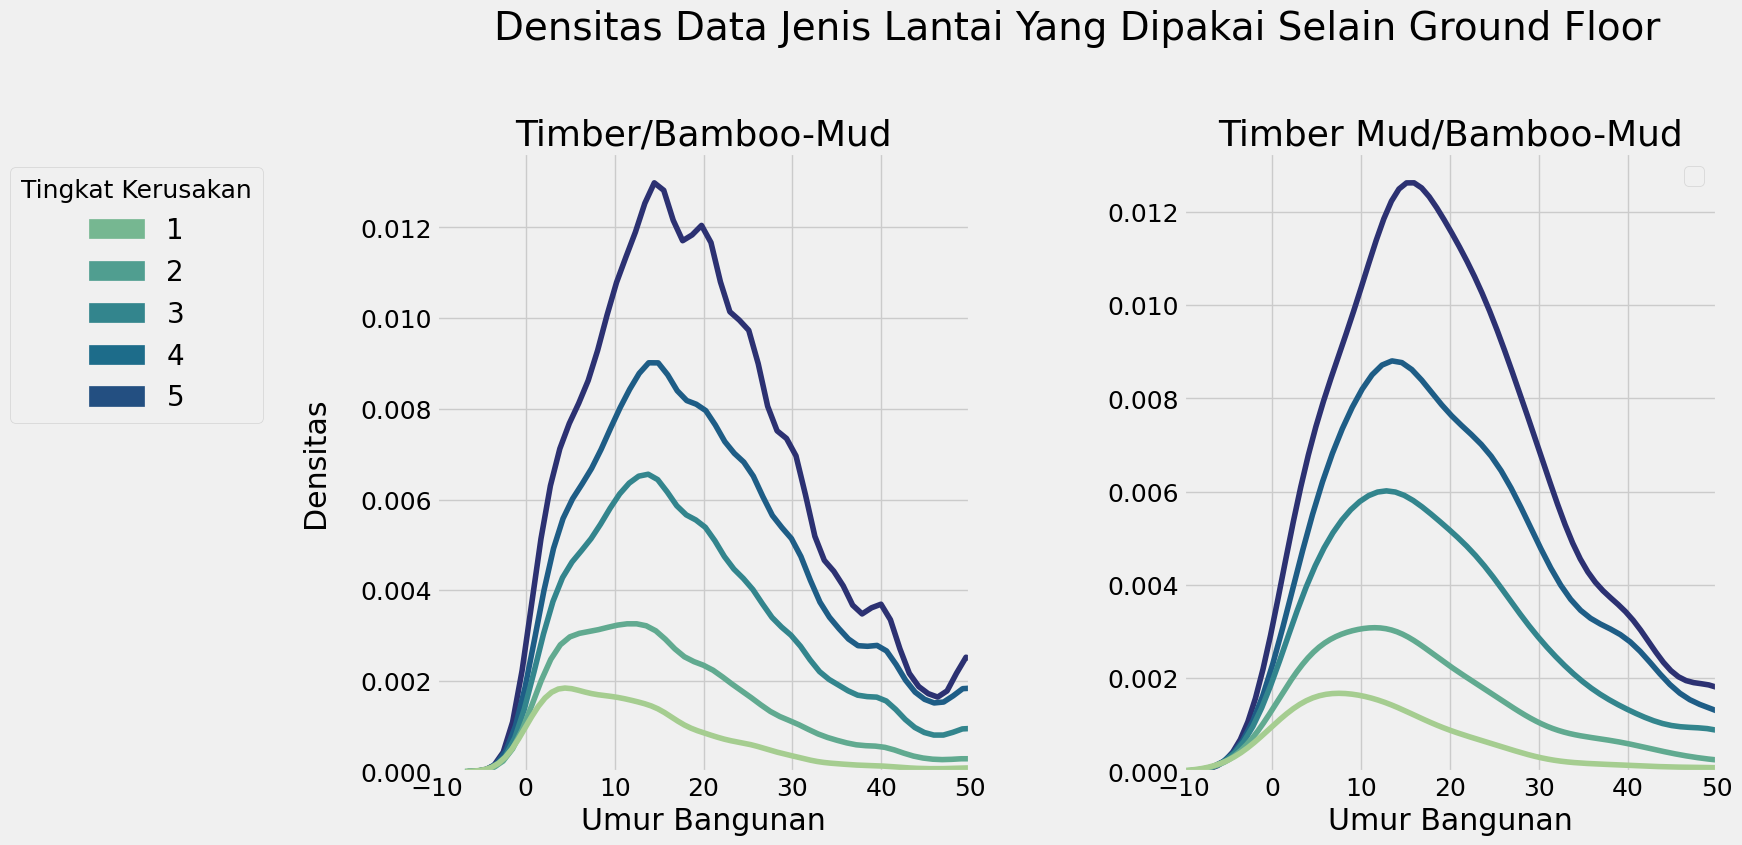

In [50]:
import matplotlib as mpl

fig = plt.figure(figsize=(16,48))

font = {'size'   : 18}

mpl.rc('font', **font)

fig.suptitle('Densitas Data Jenis Lantai Yang Dipakai Selain Ground Floor', fontsize=28)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.95,
                    wspace=0.4,
                    hspace=0.4)

plt.subplot(5,2,1)
df_bamboo = df_dropped_na[df_dropped_na['type_of_other_floor'] == 'Timber/Bamboo-Mud']
df_bamboo = df_bamboo[df_bamboo['old_building']!=999]
colors = sns.color_palette('crest', n_colors=5)[::-1]
handles = []
labels = [] 
ax = sns.kdeplot(x = df_bamboo['old_building'], hue=df_bamboo['damage_grade'], palette='crest')
for dg, color in zip(df_bamboo['damage_grade'].unique(), colors):
    handles.append(mpl.patches.Patch(color=color))
    labels.append(dg)
plt.xlim(-10,50)
plt.title('Timber/Bamboo-Mud')
plt.xlabel('Umur Bangunan')
plt.ylabel('Densitas')
ax.legend(handles=handles[::-1], labels=['1','2','3','4','5'], 
           loc='upper right', bbox_to_anchor=(-0.3, 1),
           title='Tingkat Kerusakan',
           prop={'size':20})
ax.yaxis.set_label_coords(-.2,.5)

plt.subplot(5,2,2)
df_bamboo = df_dropped_na[df_dropped_na['type_of_other_floor'] == 'Timber Mud/Bamboo-Mud']
df_bamboo = df_bamboo[df_bamboo['old_building']!=999]
sns.kdeplot(x = df_bamboo['old_building'], hue=df_bamboo['damage_grade'], palette='crest')
plt.xlim(-10,50)
plt.title('Timber Mud/Bamboo-Mud')
plt.xlabel('Umur Bangunan')
plt.ylabel('')
plt.legend('')

# plt.subplot(5,2,3)
# df_bamboo = df_dropped_na[df_dropped_na['type_of_other_floor'] == 'Not applicable']
# df_bamboo = df_bamboo[df_bamboo['old_building']!=999]
# sns.kdeplot(x = df_bamboo['old_building'], hue=df_bamboo['damage_grade'], palette='crest')
# plt.xlim(-10,50)
# plt.title('Not applicable')
# plt.xlabel('Umur Bangunan')
# plt.ylabel('')
# plt.legend('')

# plt.subplot(5,2,4)
# df_bamboo = df_dropped_na[df_dropped_na['type_of_other_floor'] == 'Wood/Bamboo-Mud']
# df_bamboo = df_bamboo[df_bamboo['old_building']!=999]
# ax2 = sns.kdeplot(x = df_bamboo['old_building'], hue=df_bamboo['damage_grade'], palette='crest')
# plt.xlim(-10,50)
# plt.title('Wood/Bamboo-Mud')
# plt.xlabel('Umur Bangunan')
# plt.ylabel('Densitas')
# ax2.yaxis.set_label_coords(-.2,.5)
# plt.legend('')

# plt.subplot(5,2,5)
# df_bamboo = df_dropped_na[df_dropped_na['type_of_other_floor'] == 'rcc/rbc']
# df_bamboo = df_bamboo[df_bamboo['old_building']!=999]
# colors = sns.color_palette('crest', n_colors=5)[::-1]
# handles = []
# labels = [] 
# ax = sns.kdeplot(x = df_bamboo['old_building'], hue=df_bamboo['damage_grade'], palette='crest')
# for dg, color in zip(df_bamboo['damage_grade'].unique(), colors):
#     handles.append(mpl.patches.Patch(color=color))
#     labels.append(dg)
# plt.xlim(-10,50)
# plt.title('rcc/rbc')
# plt.xlabel('Umur Bangunan')
# plt.ylabel('')
# plt.legend('')


# plt.subplot(5,2,6)
# df_bamboo = df_dropped_na[df_dropped_na['type_of_other_floor'] == 'Wood-Plank']
# df_bamboo = df_bamboo[df_bamboo['old_building']!=999]
# sns.kdeplot(x = df_bamboo['old_building'], hue=df_bamboo['damage_grade'], palette='crest')
# plt.xlim(-10,50)
# plt.title('Wood-Plank')
# plt.xlabel('Umur Bangunan')
# plt.ylabel('')
# plt.legend('')

# plt.subplot(5,2,7)
# df_bamboo = df_dropped_na[df_dropped_na['type_of_other_floor'] == 'Timber-Plank']
# df_bamboo = df_bamboo[df_bamboo['old_building']!=999]
# ax3 = sns.kdeplot(x = df_bamboo['old_building'], hue=df_bamboo['damage_grade'], palette='crest')
# plt.xlim(-20,50)
# plt.title('Timber-Plank')
# plt.xlabel('Umur Bangunan')
# plt.ylabel('Densitas')
# ax3.yaxis.set_label_coords(-.2,.5)
# plt.legend('')

# plt.subplot(5,2,8)
# df_bamboo = df_dropped_na[df_dropped_na['type_of_other_floor'] == 'Lumber-plank']
# df_bamboo = df_bamboo[df_bamboo['old_building']!=999]
# sns.kdeplot(x = df_bamboo['old_building'], hue=df_bamboo['damage_grade'], palette='crest')
# plt.xlim(-20,50)
# plt.title('Lumber-plank')
# plt.xlabel('Umur Bangunan')
# plt.ylabel('')
# plt.legend('')

# plt.subplot(5,2,9)
# df_bamboo = df_dropped_na[df_dropped_na['type_of_other_floor'] == 'Wood-Mud/Bamboo Mud']
# df_bamboo = df_bamboo[df_bamboo['old_building']!=999]
# sns.kdeplot(x = df_bamboo['old_building'], hue=df_bamboo['damage_grade'], palette='crest')
# plt.xlim(-20,50)
# plt.title('Wood-Mud/Bamboo Mud')
# plt.xlabel('Umur Bangunan')
# plt.ylabel('')
# plt.legend('')

Untuk lantai selain ground floor, hanya bahan rcc/rbc yang cukup kuat dan awet dalam menahan kerusakan yang disebabkan oleh gempa. Tidak menambah lantai juga merupakan opsi yang ideal untuk menghindari kerusakan tingkat tinggi pada bangunan

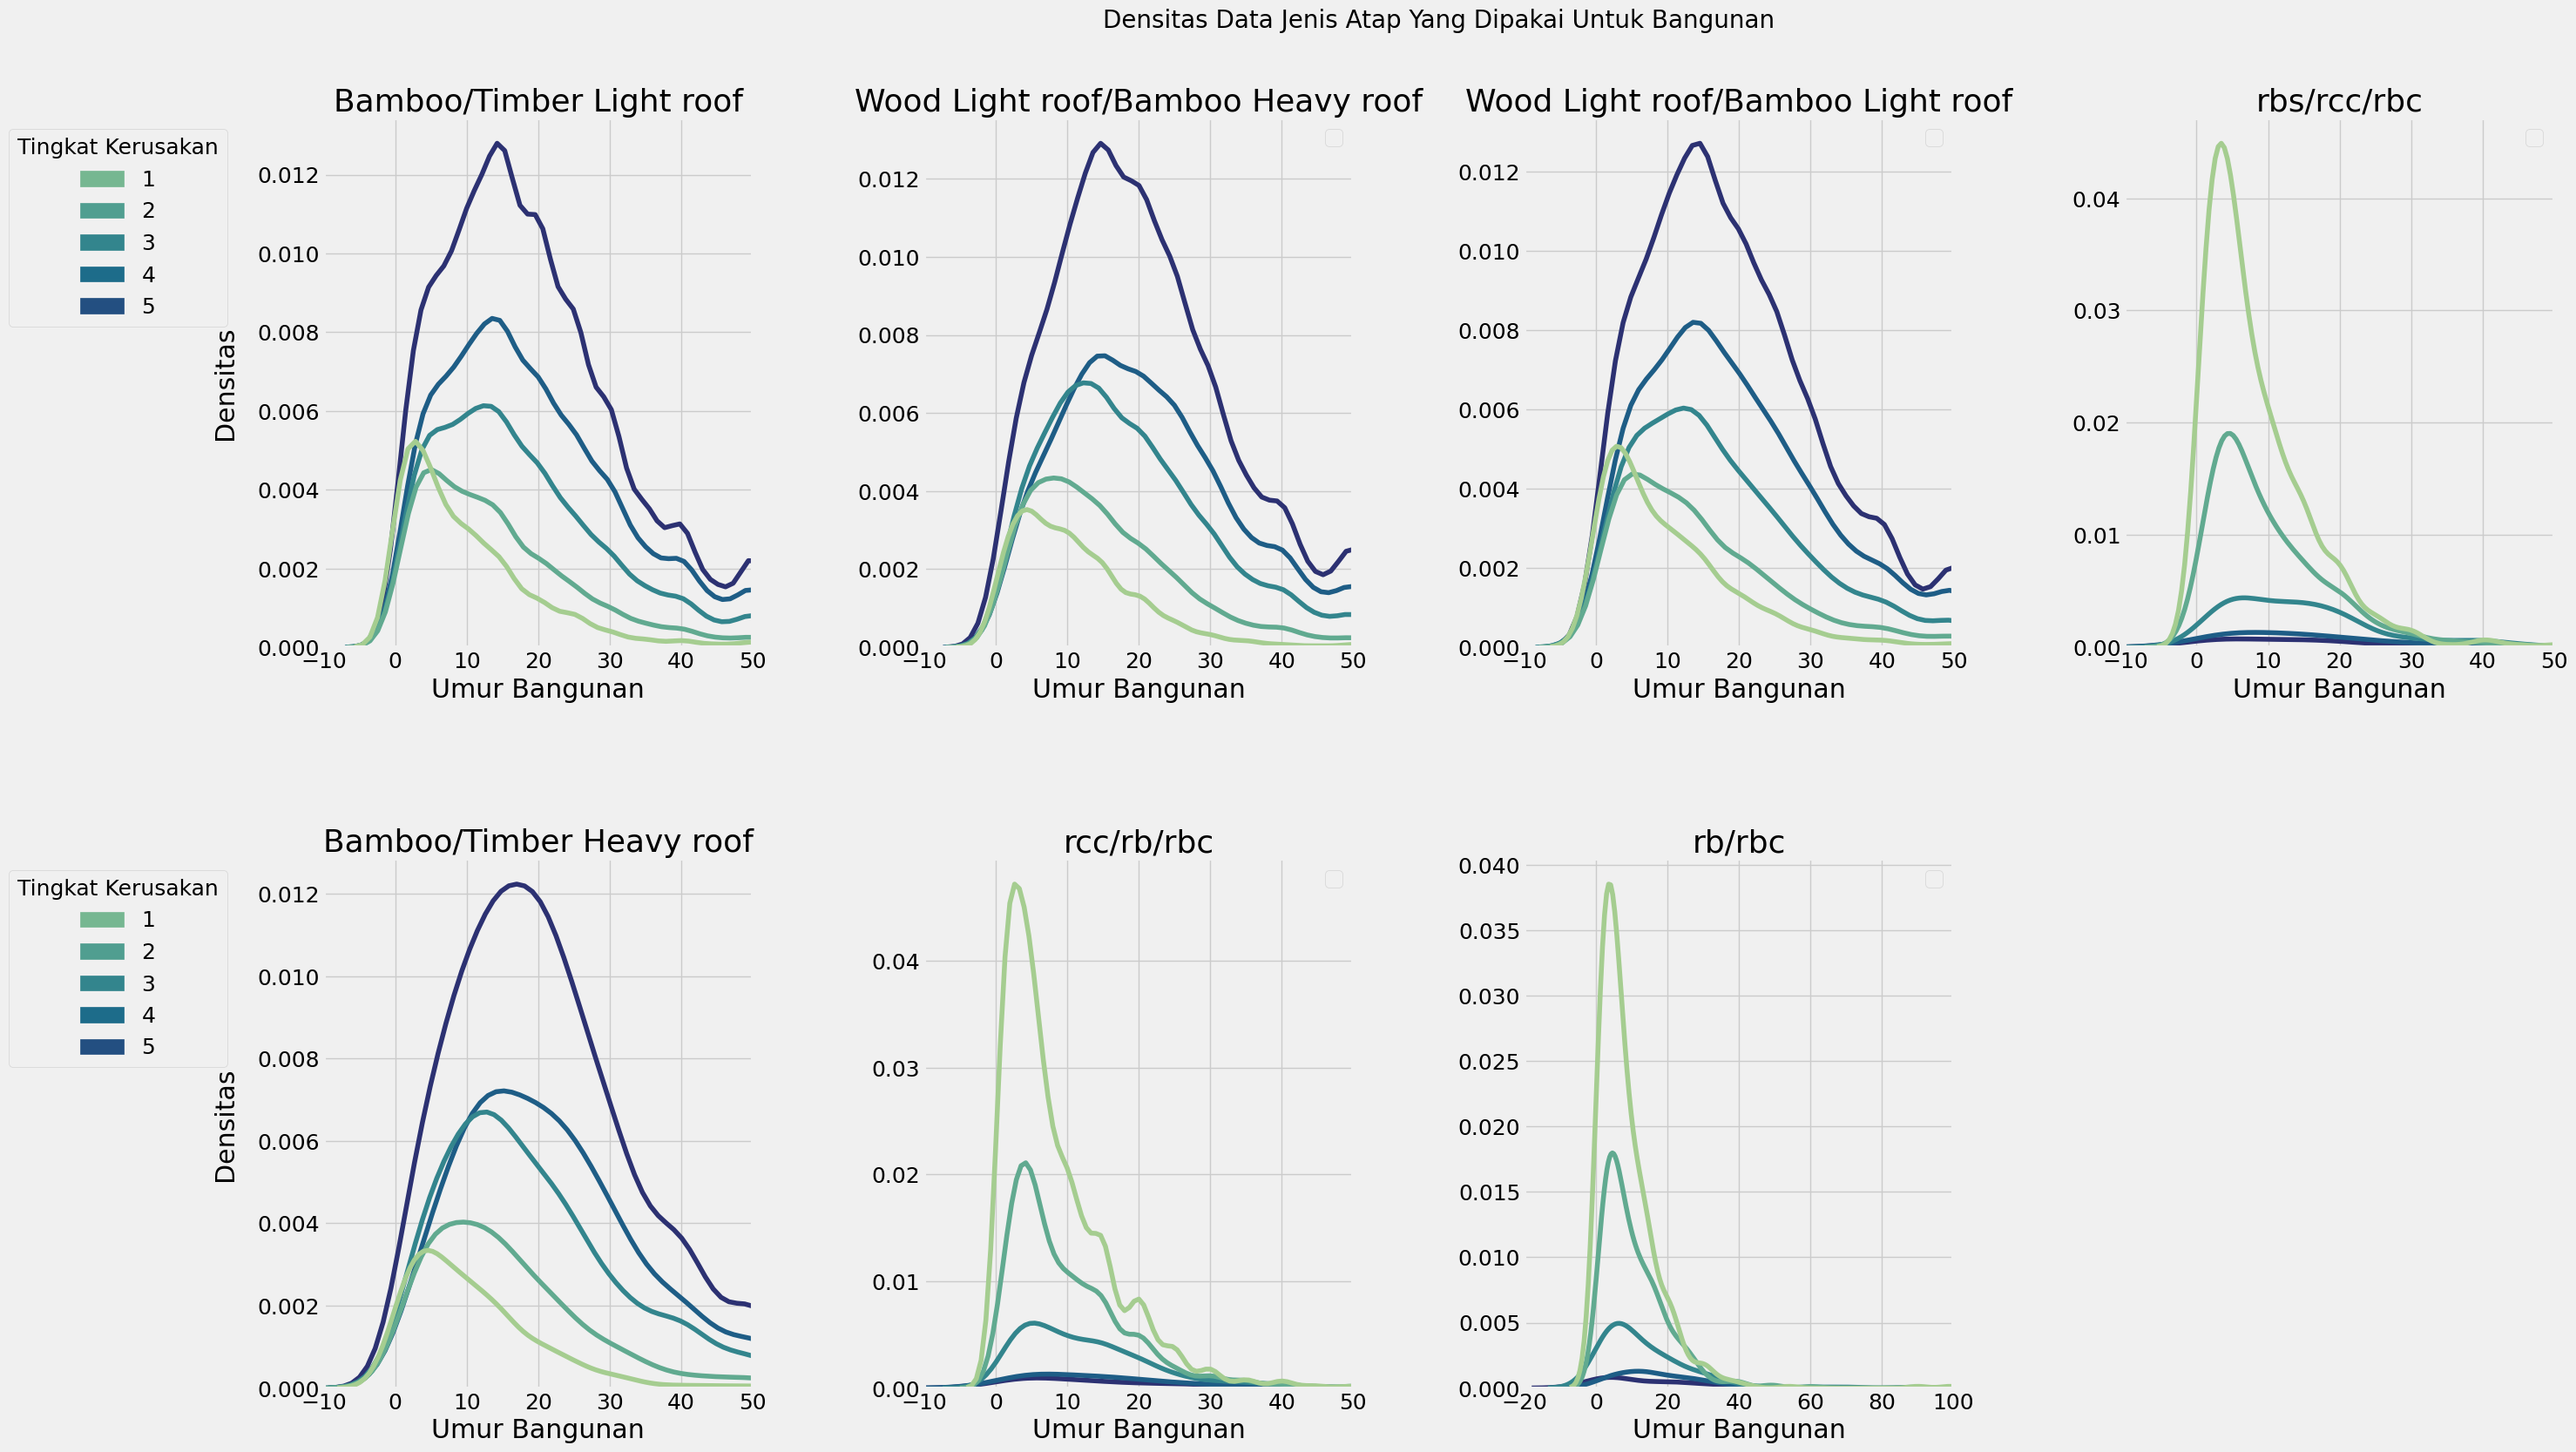

In [51]:
import matplotlib as mpl

fig = plt.figure(figsize=(32,18))

fig.suptitle('Densitas Data Jenis Atap Yang Dipakai Untuk Bangunan', fontsize=20)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.91,
                    wspace=0.4,
                    hspace=0.4)

plt.subplot(2,4,1)
df_bamboo = df_dropped_na[df_dropped_na['type_of_roof'] == 'Bamboo/Timber Light roof']
df_bamboo = df_bamboo[df_bamboo['old_building']!=999]
colors = sns.color_palette('crest', n_colors=5)[::-1]
handles = []
labels = [] 
ax = sns.kdeplot(x = df_bamboo['old_building'], hue=df_bamboo['damage_grade'], palette='crest')
for dg, color in zip(df_bamboo['damage_grade'].unique(), colors):
    handles.append(mpl.patches.Patch(color=color))
    labels.append(dg)
plt.xlim(-10,50)
plt.title('Bamboo/Timber Light roof')
plt.xlabel('Umur Bangunan')
plt.ylabel('Densitas')
ax.legend(handles=handles[::-1], labels=['1','2','3','4','5'], 
           loc='upper right', bbox_to_anchor=(-0.2, 1),
           title='Tingkat Kerusakan')
ax.yaxis.set_label_coords(-.2,.5)

plt.subplot(2,4,2)
df_bamboo = df_dropped_na[df_dropped_na['type_of_roof'] == 'Wood Light roof/Bamboo Heavy roof']
df_bamboo = df_bamboo[df_bamboo['old_building']!=999]
sns.kdeplot(x = df_bamboo['old_building'], hue=df_bamboo['damage_grade'], palette='crest')
plt.xlim(-10,50)
plt.title('Wood Light roof/Bamboo Heavy roof')
plt.xlabel('Umur Bangunan')
plt.ylabel('')
plt.legend('')

plt.subplot(2,4,3)
df_bamboo = df_dropped_na[df_dropped_na['type_of_roof'] == 'Wood Light roof/Bamboo Light roof']
df_bamboo = df_bamboo[df_bamboo['old_building']!=999]
sns.kdeplot(x = df_bamboo['old_building'], hue=df_bamboo['damage_grade'], palette='crest')
plt.xlim(-10,50)
plt.title('Wood Light roof/Bamboo Light roof')
plt.xlabel('Umur Bangunan')
plt.ylabel('')
plt.legend('')

plt.subplot(2,4,4)
df_bamboo = df_dropped_na[df_dropped_na['type_of_roof'] == 'rbs/rcc/rbc']
df_bamboo = df_bamboo[df_bamboo['old_building']!=999]
sns.kdeplot(x = df_bamboo['old_building'], hue=df_bamboo['damage_grade'], palette='crest')
plt.xlim(-10,50)
plt.title('rbs/rcc/rbc')
plt.xlabel('Umur Bangunan')
plt.ylabel('')
plt.legend('')

plt.subplot(2,4,5)
df_bamboo = df_dropped_na[df_dropped_na['type_of_roof'] == 'Bamboo/Timber Heavy roof']
df_bamboo = df_bamboo[df_bamboo['old_building']!=999]
colors = sns.color_palette('crest', n_colors=5)[::-1]
handles = []
labels = [] 
ax = sns.kdeplot(x = df_bamboo['old_building'], hue=df_bamboo['damage_grade'], palette='crest')
for dg, color in zip(df_bamboo['damage_grade'].unique(), colors):
    handles.append(mpl.patches.Patch(color=color))
    labels.append(dg)
plt.xlim(-10,50)
plt.title('Bamboo/Timber Heavy roof')
plt.xlabel('Umur Bangunan')
plt.ylabel('Densitas')
ax.legend(handles=handles[::-1], labels=['1','2','3','4','5'], 
           loc='upper right', bbox_to_anchor=(-0.2, 1),
           title='Tingkat Kerusakan')
ax.yaxis.set_label_coords(-.2,.5)

plt.subplot(2,4,6)
df_bamboo = df_dropped_na[df_dropped_na['type_of_roof'] == 'rcc/rb/rbc']
df_bamboo = df_bamboo[df_bamboo['old_building']!=999]
sns.kdeplot(x = df_bamboo['old_building'], hue=df_bamboo['damage_grade'], palette='crest')
plt.xlim(-10,50)
plt.title('rcc/rb/rbc')
plt.xlabel('Umur Bangunan')
plt.ylabel('')
plt.legend('')

plt.subplot(2,4,7)
df_bamboo = df_dropped_na[df_dropped_na['type_of_roof'] == 'rb/rbc']
df_bamboo = df_bamboo[df_bamboo['old_building']!=999]
sns.kdeplot(x = df_bamboo['old_building'], hue=df_bamboo['damage_grade'], palette='crest')
plt.xlim(-20,100)
plt.title('rb/rbc')
plt.xlabel('Umur Bangunan')
plt.ylabel('')
plt.legend('')

Visualisasi tersebut mengungkap bahwa meskipun Bamboo/Timber merupakan bahan yang kuat dan bertahan lama untuk dijadikan fondasi, bahan tersebut patut dihindari untuk dijadikan bahan atap. Bahan yang ideal adalah rcc, rb, rbc, dan rbs

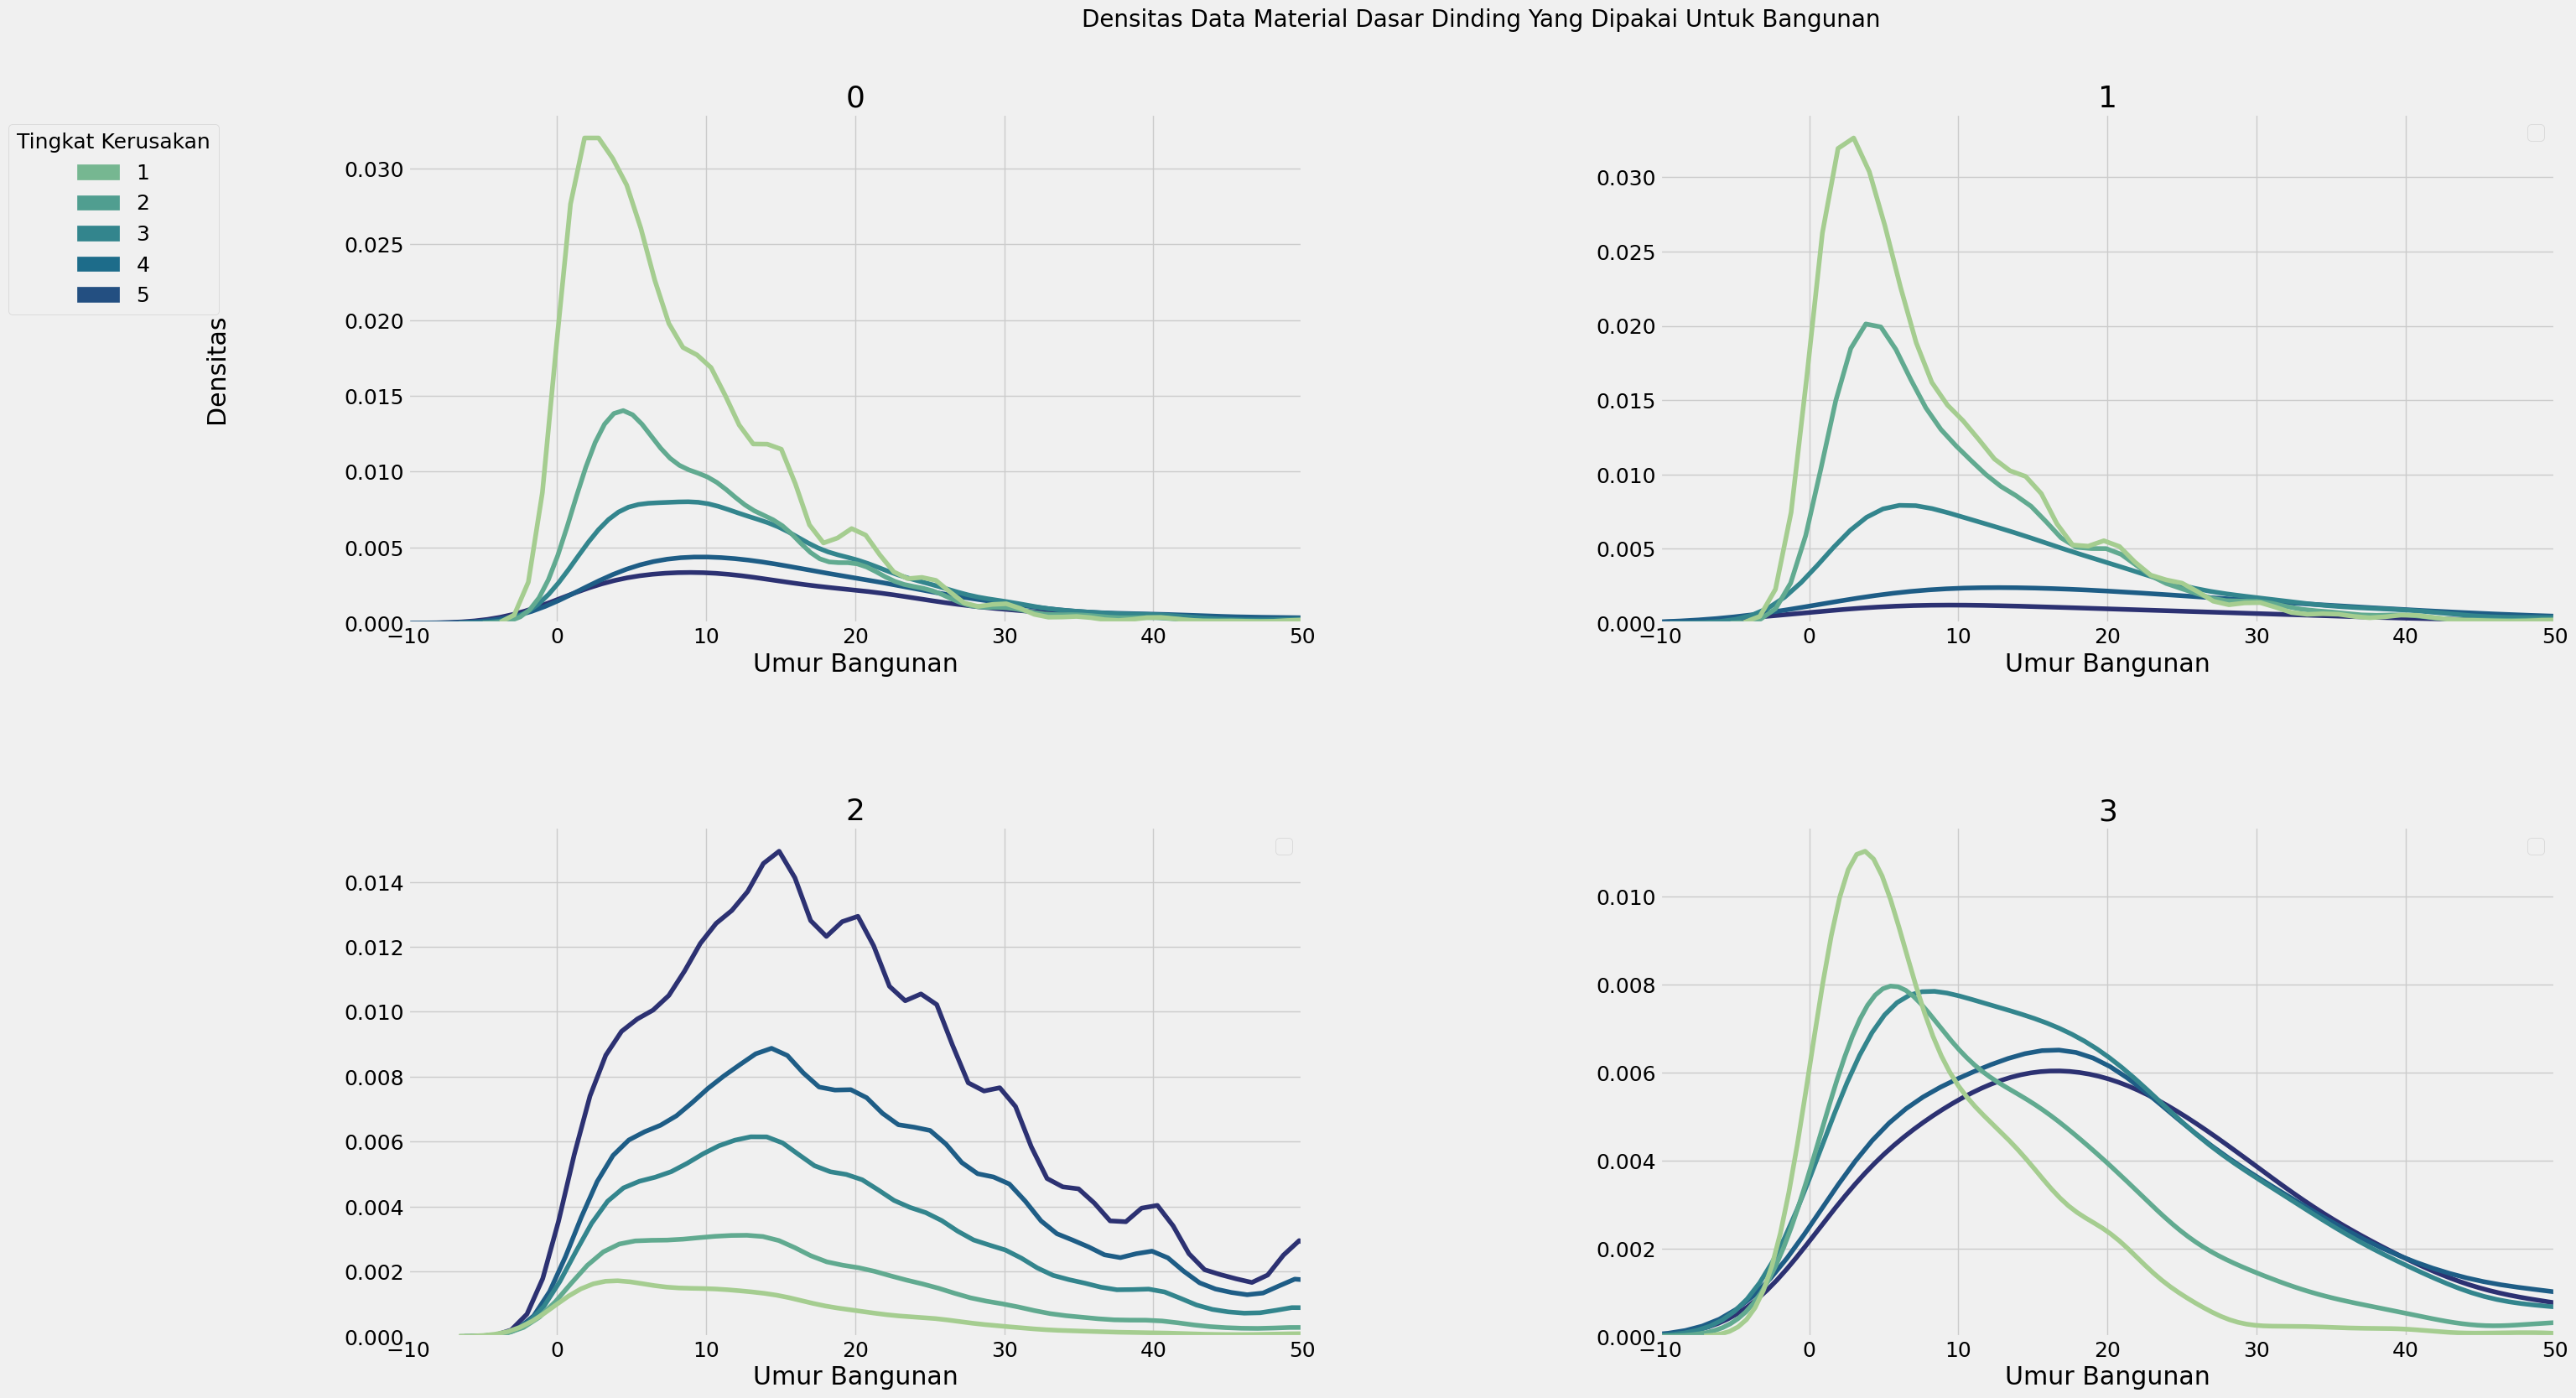

In [52]:
import matplotlib as mpl

fig = plt.figure(figsize=(32,18))

fig.suptitle('Densitas Data Material Dasar Dinding Yang Dipakai Untuk Bangunan', fontsize=20)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.91,
                    wspace=0.4,
                    hspace=0.4)

plt.subplot(2,2,1)
df_bamboo = df_dropped_na[df_dropped_na['wall_material'] == 0]
df_bamboo = df_bamboo[df_bamboo['old_building']!=999]
colors = sns.color_palette('crest', n_colors=5)[::-1]
handles = []
labels = [] 
ax = sns.kdeplot(x = df_bamboo['old_building'], hue=df_bamboo['damage_grade'], palette='crest')
for dg, color in zip(df_bamboo['damage_grade'].unique(), colors):
    handles.append(mpl.patches.Patch(color=color))
    labels.append(dg)
plt.xlim(-10,50)
plt.title(0)
plt.xlabel('Umur Bangunan')
plt.ylabel('Densitas')
ax.legend(handles=handles[::-1], labels=['1','2','3','4','5'], 
           loc='upper right', bbox_to_anchor=(-0.2, 1),
           title='Tingkat Kerusakan')
ax.yaxis.set_label_coords(-.2,.5)

plt.subplot(2,2,2)
df_bamboo = df_dropped_na[df_dropped_na['wall_material'] == 1]
df_bamboo = df_bamboo[df_bamboo['old_building']!=999]
sns.kdeplot(x = df_bamboo['old_building'], hue=df_bamboo['damage_grade'], palette='crest')
plt.xlim(-10,50)
plt.title(1)
plt.xlabel('Umur Bangunan')
plt.ylabel('')
plt.legend('')

plt.subplot(2,2,3)
df_bamboo = df_dropped_na[df_dropped_na['wall_material'] == 2]
df_bamboo = df_bamboo[df_bamboo['old_building']!=999]
sns.kdeplot(x = df_bamboo['old_building'], hue=df_bamboo['damage_grade'], palette='crest')
plt.xlim(-10,50)
plt.title(2)
plt.xlabel('Umur Bangunan')
plt.ylabel('')
plt.legend('')

plt.subplot(2,2,4)
df_bamboo = df_dropped_na[df_dropped_na['wall_material'] == 3]
df_bamboo = df_bamboo[df_bamboo['old_building']!=999]
sns.kdeplot(x = df_bamboo['old_building'], hue=df_bamboo['damage_grade'], palette='crest')
plt.xlim(-10,50)
plt.title(3)
plt.xlabel('Umur Bangunan')
plt.ylabel('')
plt.legend('')

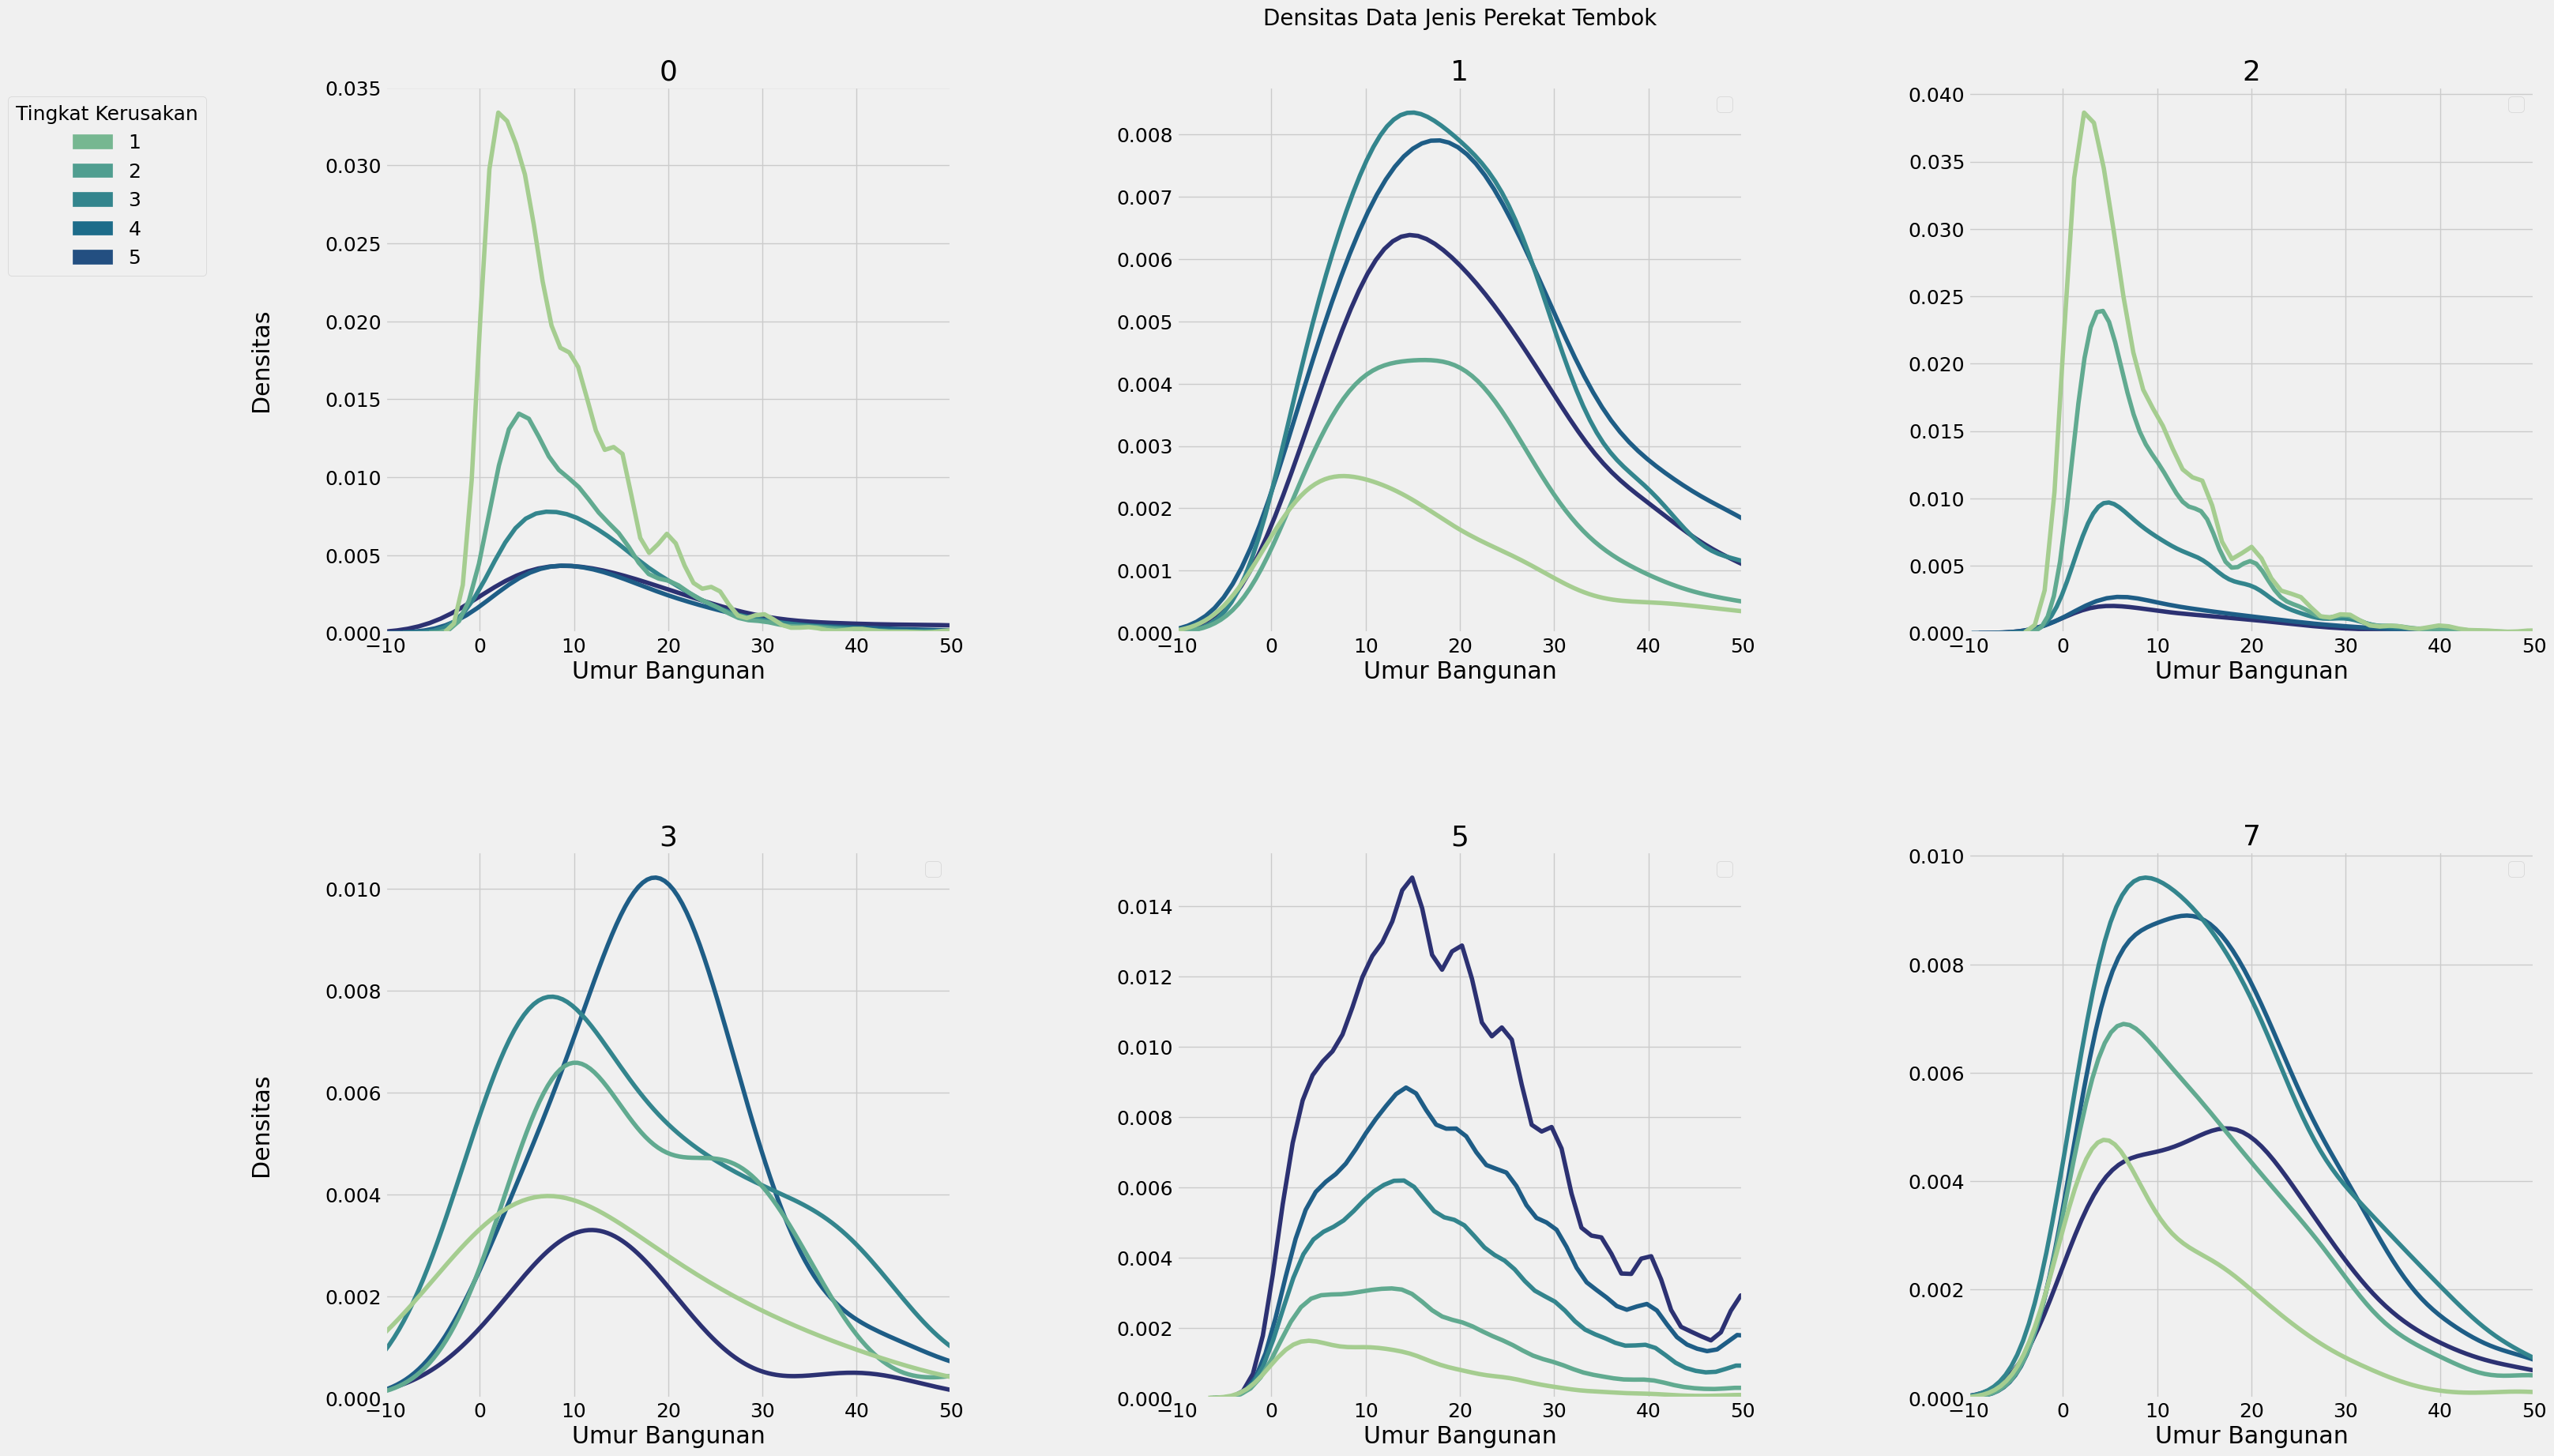

In [53]:
import matplotlib as mpl

fig = plt.figure(figsize=(34,20))

fig.suptitle('Densitas Data Jenis Perekat Tembok', fontsize=20)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.93,
                    wspace=0.4,
                    hspace=0.4)

plt.subplot(2,3,1)
df_bamboo = df_dropped_na[df_dropped_na['wall_binding'] == 0]
df_bamboo = df_bamboo[df_bamboo['old_building']!=999]
colors = sns.color_palette('crest', n_colors=5)[::-1]
handles = []
labels = [] 
ax = sns.kdeplot(x = df_bamboo['old_building'], hue=df_bamboo['damage_grade'], palette='crest')
for dg, color in zip(df_bamboo['damage_grade'].unique(), colors):
    handles.append(mpl.patches.Patch(color=color))
    labels.append(dg)
plt.xlim(-10,50)
plt.title(0)
plt.xlabel('Umur Bangunan')
plt.ylabel('Densitas')
ax.legend(handles=handles[::-1], labels=['1','2','3','4','5'], 
           loc='upper right', bbox_to_anchor=(-0.3, 1),
           title='Tingkat Kerusakan')
ax.yaxis.set_label_coords(-.2,.5)

plt.subplot(2,3,2)
df_bamboo = df_dropped_na[df_dropped_na['wall_binding'] == 1]
df_bamboo = df_bamboo[df_bamboo['old_building']!=999]
sns.kdeplot(x = df_bamboo['old_building'], hue=df_bamboo['damage_grade'], palette='crest')
plt.xlim(-10,50)
plt.title(1)
plt.xlabel('Umur Bangunan')
plt.ylabel('')
plt.legend('')

plt.subplot(2,3,3)
df_bamboo = df_dropped_na[df_dropped_na['wall_binding'] == 2]
df_bamboo = df_bamboo[df_bamboo['old_building']!=999]
sns.kdeplot(x = df_bamboo['old_building'], hue=df_bamboo['damage_grade'], palette='crest')
plt.xlim(-10,50)
plt.title(2)
plt.xlabel('Umur Bangunan')
plt.ylabel('')
plt.legend('')

plt.subplot(2,3,4)
df_bamboo = df_dropped_na[df_dropped_na['wall_binding'] == 3]
df_bamboo = df_bamboo[df_bamboo['old_building']!=999]
ax2 = sns.kdeplot(x = df_bamboo['old_building'], hue=df_bamboo['damage_grade'], palette='crest')
plt.xlim(-10,50)
plt.title(3)
plt.xlabel('Umur Bangunan')
plt.ylabel('Densitas')
ax2.yaxis.set_label_coords(-.2,.5)
plt.legend('')

plt.subplot(2,3,5)
df_bamboo = df_dropped_na[df_dropped_na['wall_binding'] == 5]
df_bamboo = df_bamboo[df_bamboo['old_building']!=999]
colors = sns.color_palette('crest', n_colors=5)[::-1]
handles = []
labels = [] 
ax = sns.kdeplot(x = df_bamboo['old_building'], hue=df_bamboo['damage_grade'], palette='crest')
for dg, color in zip(df_bamboo['damage_grade'].unique(), colors):
    handles.append(mpl.patches.Patch(color=color))
    labels.append(dg)
plt.xlim(-10,50)
plt.title(5)
plt.xlabel('Umur Bangunan')
plt.ylabel('')
plt.legend('')


plt.subplot(2,3,6)
df_bamboo = df_dropped_na[df_dropped_na['wall_binding'] == 7]
df_bamboo = df_bamboo[df_bamboo['old_building']!=999]
sns.kdeplot(x = df_bamboo['old_building'], hue=df_bamboo['damage_grade'], palette='crest')
plt.xlim(-10,50)
plt.title(7)
plt.xlabel('Umur Bangunan')
plt.ylabel('')
plt.legend('')

Diantara semua jenis dinding, hanya Stone Brick yang memiliki asosiasi paling kuat dengan tingkat kerusakan tinggi

Selanjutnya, mari kita lihat apakah ada faktor lain yang dapat mempengaruhi tingkat ketahanan bangunan. Fitur yang dapat dianalisis lebih lanjut adalah :

1. flexible_superstructure
2. position
3. land_surface_condition
4. wall_binding
5. type_of_reinforcement_concrete

Pendekatan akan dilakukan dengan mengombinasikan setiap kombinasi tipe fondasi, atap, ground floor, other floor, dan wall material dengan kecenderungan tingkat kerusakan yang tinggi, kemudian membandingkan tingkat kerusakan yang terjadi berdasarkan nilai pada tiga fitur tersebut

In [54]:
df_worst_combination = df_dropped_na[
    df_dropped_na['type_of_roof'].isin(['Bamboo/Timber Light roof','Wood Light roof/Bamboo Heavy roof','Wood Light roof/Bamboo Light roof','Bamboo/Timber Heavy roof']) & 
    ~df_dropped_na['type_of_other_floor'].isin(['rcc/rbc','Not applicable']) &
    df_dropped_na['type_of_ground_floor'].isin(['Clay','Mud','Brick/Stone','soil, water, loam Mixed']) &
    df_dropped_na['type_of_foundation'].isin(['Clay Sand Mixed mortar-Stone/Brick','Clay mortar-Stone/Brick','Mud mortar-Stone/Brick']) &
    df_dropped_na['wall_material'].isin([2])
]

In [55]:
len(df_worst_combination)

202459

In [56]:
pd.set_option('display.max_rows', 100)
df_worst_combination.groupby(['flexible_superstructure','damage_grade']).describe()

floors_before_eq (total)            \
                                                        count      mean   
flexible_superstructure damage_grade                                      
available               1.0                             595.0  2.068908   
                        2.0                            1301.0  2.073021   
                        3.0                            2267.0  2.120865   
                        4.0                            3033.0  2.201780   
                        5.0                            3353.0  2.422607   
unavailable             1.0                            5142.0  2.140607   
                        2.0                           13902.0  2.184865   
                        3.0                           33380.0  2.224056   
                        4.0                           54019.0  2.295192   
                        5.0                           85467.0  2.342389   

                                                                         \
                                           std  min  25%  50%  75%  max   
flexible_superstructure damage_grade                                      
available               1.0           0.260066  1.0  2.0  2.0  2.0  3.0   
                        2.0           0.266116  1.0  2.0  2.0  2.0  4.0   
                        3.0           0.327392  2.0  2.0  2.0  2.0  4.0   
                        4.0           0.403853  1.0  2.0  2.0  2.0  4.0   
                        5.0           0.496457  2.0  2.0  2.0  3.0  4.0   
unavailable             1.0           0.359748  1.0  2.0  2.0  2.0  7.0   
                        2.0           0.394453  1.0  2.0  2.0  2.0  5.0   
                        3.0           0.422604  1.0  2.0  2.0  2.0  9.0   
                        4.0           0.461058  1.0  2.0  2.0  3.0  5.0   
                        5.0           0.481610  1.0  2.0  2.0  3.0  9.0   

                                     old_building             ...  \
                                            count       mean  ...   
flexible_superstructure damage_grade                          ...   
available               1.0                 595.0  13.435294  ...   
                        2.0                1301.0  17.600307  ...   
                        3.0                2267.0  20.687693  ...   
                        4.0                3033.0  21.649852  ...   
                        5.0                3353.0  22.376678  ...   
unavailable             1.0                5142.0  21.889926  ...   
                        2.0               13902.0  25.353690  ...   
                        3.0               33380.0  27.273367  ...   
                        4.0               54019.0  27.983284  ...   
                        5.0               85467.0  27.338914  ...   

                                     wall_binding      wall_material       \
                                              75%  max         count mean   
flexible_superstructure damage_grade                                        
available               1.0                   5.0  7.0         595.0  2.0   
                        2.0                   5.0  7.0        1301.0  2.0   
                        3.0                   5.0  7.0        2267.0  2.0   
                        4.0                   5.0  7.0        3033.0  2.0   
                        5.0                   5.0  7.0        3353.0  2.0   
unavailable             1.0                   5.0  7.0        5142.0  2.0   
                        2.0                   5.0  7.0       13902.0  2.0   
                        3.0                   5.0  7.0       33380.0  2.0   
                        4.0                   5.0  7.0       54019.0  2.0   
                        5.0                   5.0  7.0       85467.0  2.0   

                                                                    
                                      std  min  25%  50%  75%  max  
flexible_superstructure damage_grade           

Porsi Unavailable Lebih Banyak Dibanding Available

In [57]:
df_worst_combination.groupby(['position','damage_grade']).describe()

floors_before_eq (total)                      \
                                                count      mean       std   
position        damage_grade                                                
Attached-1 side 1.0                             393.0  2.188295  0.468569   
                2.0                            1893.0  2.206022  0.418678   
                3.0                            5548.0  2.230894  0.426122   
                4.0                           10056.0  2.309666  0.470058   
                5.0                           17425.0  2.352654  0.492479   
Attached-2 side 1.0                              48.0  2.208333  0.459340   
                2.0                             262.0  2.251908  0.468854   
                3.0                             732.0  2.355191  0.527818   
                4.0                            1271.0  2.350118  0.515276   
                5.0                            2232.0  2.357975  0.503229   
Attached-3 side 1.0                               4.0  2.250000  0.500000   
                2.0                              18.0  2.111111  0.323381   
                3.0                              22.0  2.272727  0.455842   
                4.0                              50.0  2.360000  0.692820   
                5.0                              34.0  2.205882  0.410426   
Not attached    1.0                            5292.0  2.128307  0.339510   
                2.0                           13030.0  2.169378  0.379373   
                3.0                           29345.0  2.211484  0.412602   
                4.0                           45675.0  2.284204  0.453894   
                5.0                           69129.0  2.343257  0.479167   

                                                       old_building  \
                              min  25%  50%   75%  max        count   
position        damage_grade                                          
Attached-1 side 1.0           1.0  2.0  2.0  2.00  7.0        393.0   
                2.0           1.0  2.0  2.0  2.00  5.0       1893.0   
                3.0           1.0  2.0  2.0  2.00  4.0       5548.0   
                4.0           1.0  2.0  2.0  3.00  4.0      10056.0   
                5.0           2.0  2.0  2.0  3.00  9.0      17425.0   
Attached-2 side 1.0           2.0  2.0  2.0  2.00  4.0         48.0   
                2.0           2.0  2.0  2.0  2.00  4.0        262.0   
                3.0           2.0  2.0  2.0  3.00  5.0        732.0   
                4.0           2.0  2.0  2.0  3.00  5.0       1271.0   
                5.0           2.0  2.0  2.0  3.00  4.0       2232.0   
Attached-3 side 1.0           2.0  2.0  2.0  2.25  3.0          4.0   
                2.0           2.0  2.0  2.0  2.00  3.0         18.0   
                3.0           2.0  2.0  2.0  2.75  3.0         22.0   
                4.0           2.0  2.0  2.0  2.00  4.0         50.0   
                5.0           2.0  2.0  2.0  2.00  3.0         34.0   
Not attached    1.0           1.0  2.0  2.0  2.00  4.0       5292.0   
                2.0           1.0  2.0  2.0  2.00  4.0      13030.0   
                3.0           1.0  2.0  2.0  2.00  9.0      29345.0   
                4.0           1.0  2.0  2.0  3.00  5.0      45675.0   
                5.0           1.0  2.0  2.0  3.00  9.0      69129.0   

                                         ... wall_binding      wall_material  \
                                   mean  ...          75%  max         count   
position        damage_grade             ...                                   
Attached-1 side 1.0           28.170483  ...          5.0  7.0         393.0   
                2.0           29.324353  ...          5.0  7.0        1893.0   
                3.0           27.556777  ...          5.0  7.0        5548.0   
                4.0           28.860979  ...          5.0  7.0       10056.0   
                5.0           28.189785  ...          5.0  7.0 

Porsi Not Attached Paling Banyak

In [58]:
df_worst_combination.groupby(['land_surface_condition','damage_grade']).describe()

floors_before_eq (total)            \
                                                       count      mean   
land_surface_condition damage_grade                                      
Flat                   1.0                            4809.0  2.142441   
                       2.0                           12709.0  2.184594   
                       3.0                           29066.0  2.225521   
                       4.0                           46398.0  2.298978   
                       5.0                           74367.0  2.353557   
Moderate slope         1.0                             735.0  2.092517   
                       2.0                            2131.0  2.128578   
                       3.0                            5476.0  2.185537   
                       4.0                            8718.0  2.255219   
                       5.0                           11400.0  2.319912   
Steep slope            1.0                             193.0  2.056995   
                       2.0                             363.0  2.123967   
                       3.0                            1105.0  2.164706   
                       4.0                            1936.0  2.238120   
                       5.0                            3053.0  2.242385   

                                                                        \
                                          std  min  25%  50%  75%  max   
land_surface_condition damage_grade                                      
Flat                   1.0           0.362966  1.0  2.0  2.0  2.0  7.0   
                       2.0           0.394420  1.0  2.0  2.0  2.0  5.0   
                       3.0           0.423412  1.0  2.0  2.0  2.0  9.0   
                       4.0           0.462639  1.0  2.0  2.0  3.0  5.0   
                       5.0           0.485390  1.0  2.0  2.0  3.0  9.0   
Moderate slope         1.0           0.289952  2.0  2.0  2.0  2.0  3.0   
                       2.0           0.337604  1.0  2.0  2.0  2.0  4.0   
                       3.0           0.394365  1.0  2.0  2.0  2.0  4.0   
                       4.0           0.440459  1.0  2.0  2.0  3.0  4.0   
                       5.0           0.472071  2.0  2.0  2.0  3.0  7.0   
Steep slope            1.0           0.232436  2.0  2.0  2.0  2.0  3.0   
                       2.0           0.346336  2.0  2.0  2.0  2.0  4.0   
                       3.0           0.373516  1.0  2.0  2.0  2.0  3.0   
                       4.0           0.432065  1.0  2.0  2.0  2.0  4.0   
                       5.0           0.430122  2.0  2.0  2.0  2.0  4.0   

                                    old_building             ... wall_binding  \
                                           count       mean  ...          75%   
land_surface_condition damage_grade                          ...                
Flat                   1.0                4809.0  21.329590  ...          5.0   
                       2.0               12709.0  25.181761  ...          5.0   
                       3.0               29066.0  27.231955  ...          5.0   
                       4.0               46398.0  27.865921  ...          5.0   
                       5.0               74367.0  27.571786  ...          5.0   
Moderate slope         1.0                 735.0  17.956463  ...          5.0   
                       2.0                2131.0  22.533552  ...          5.0   
                       3.0                5476.0  26.120343  ...          5.0   
                       4.0                8718.0  27.318651  ...          5.0   
                       5.0               11400.0  25.474298  ...          5.0   
Steep slope            1.0                 193.0  24.766839  ...          5.0   
                       2.0                 363.0  20.140496  ...          5.0   
                       3.0                1105.0  20.565611  ...          5.0   
                       4.0                1936.0  23.866736  ...          

Porsi Flat Paling Banyak

In [59]:
df_worst_combination.groupby(['wall_binding','damage_grade']).describe()

floors_before_eq (total)                           \
                                             count      mean       std  min   
wall_binding damage_grade                                                     
0.0          1.0                              17.0  2.058824  0.242536  2.0   
             2.0                             125.0  2.048000  0.214626  2.0   
             3.0                             299.0  2.060201  0.238257  2.0   
             4.0                             423.0  2.052009  0.222309  2.0   
             5.0                             903.0  2.125138  0.337690  2.0   
1.0          1.0                               2.0  2.500000  0.707107  2.0   
             2.0                               2.0  2.000000  0.000000  2.0   
             3.0                               5.0  2.400000  0.547723  2.0   
             4.0                               7.0  2.571429  0.534522  2.0   
             5.0                               5.0  2.600000  0.547723  2.0   
2.0          1.0                              18.0  2.000000  0.000000  2.0   
             2.0                              36.0  2.083333  0.368394  2.0   
             3.0                              56.0  2.160714  0.370591  2.0   
             4.0                              68.0  2.308824  0.553344  1.0   
             5.0                              74.0  2.243243  0.462596  2.0   
3.0          2.0                               1.0  2.000000       NaN  2.0   
             3.0                               6.0  2.166667  0.408248  2.0   
             4.0                               9.0  2.222222  0.666667  2.0   
             5.0                               1.0  2.000000       NaN  2.0   
5.0          1.0                            5661.0  2.133192  0.351064  1.0   
             2.0                           14904.0  2.175859  0.386485  1.0   
             3.0                           34997.0  2.219162  0.419037  1.0   
             4.0                           56236.0  2.291842  0.459206  1.0   
             5.0                           87637.0  2.347536  0.482995  1.0   
7.0          1.0                              39.0  2.205128  0.469013  2.0   
             2.0                             135.0  2.259259  0.472576  2.0   
             3.0                             284.0  2.186620  0.407999  2.0   
             4.0                             309.0  2.313916  0.485337  2.0   
             5.0                             200.0  2.445000  0.546322  2.0   

                                                old_building              ...  \
                            25%  50%   75%  max        count        mean  ...   
wall_binding damage_grade                                                 ...   
0.0          1.0           2.00  2.0  2.00  3.0         17.0  475.000000  ...   
             2.0           2.00  2.0  2.00  3.0        125.0   72.240000  ...   
             3.0           2.00  2.0  2.00  3.0        299.0   63.826087  ...   
             4.0           2.00  2.0  2.00  3.0        423.0   33.520095  ...   
             5.0           2.00  2.0  2.00  4.0        903.0   30.517165  ...   
1.0          1.0           2.25  2.5  2.75  3.0          2.0   33.500000  ...   
             2.0           2.00  2.0  2.00  2.0          2.0   22.500000  ...   
             3.0           2.00  2.0  3.00  3.0          5.0  219.000000  ...   
             4.0           2.00  3.0  3.00  3.0          7.0  161.142857  ...   
             5.0           2.00  3.0  3.00  3.0          5.0   44.000000  ...   
2.0          1.0           2.00  2.0  2.00  2.0         18.0   10.833333  ...   
             2.0           2.00  2.0  2.00  4.0         36.0   14.055556  ...   
             3.0           2.00  2.0  2.00  3.0         56.0   17.339286  ...   
             4.0           2.00  2.0  3.00  4.0         68.0   19.970588  ...   
             5.0           2.00  2.0  2.00  4.0         74.0   20.081081  ...   
3.0          2.0           2.00  2.0  2

Porsi 5 (Mud + Mortar, Clay) Paling Banyak

In [60]:
df_worst_combination.groupby(['type_of_reinforcement_concrete','damage_grade']).describe()['floors_before_eq (total)']

count      mean       std  min  \
type_of_reinforcement_concrete damage_grade                                     
0.0                            1.0            5671.0  2.131194  0.348439  1.0   
                               2.0           14935.0  2.171142  0.382292  1.0   
                               3.0           35207.0  2.215724  0.416408  1.0   
                               4.0           56492.0  2.291404  0.459141  1.0   
                               5.0           87972.0  2.345110  0.482268  1.0   
1.0                            1.0              66.0  2.303030  0.525348  2.0   
                               2.0             266.0  2.409774  0.522456  2.0   
                               3.0             438.0  2.360731  0.508519  2.0   
                               4.0             558.0  2.172043  0.391755  1.0   
                               5.0             843.0  2.378410  0.497365  2.0   
2.0                            2.0               2.0  2.000000  0.000000  2.0   
                               3.0               1.0  2.000000       NaN  2.0   
                               4.0               1.0  2.000000       NaN  2.0   
                               5.0               4.0  2.250000  0.500000  2.0   
3.0                            3.0               1.0  2.000000       NaN  2.0   
                               4.0               1.0  2.000000       NaN  2.0   
                               5.0               1.0  2.000000       NaN  2.0   

                                             25%  50%   75%  max  
type_of_reinforcement_concrete damage_grade                       
0.0                            1.0           2.0  2.0  2.00  7.0  
                               2.0           2.0  2.0  2.00  5.0  
                               3.0           2.0  2.0  2.00  9.0  
                               4.0           2.0  2.0  3.00  5.0  
                               5.0           2.0  2.0  3.00  9.0  
1.0                            1.0           2.0  2.0  3.00  4.0  
                               2.0           2.0  2.0  3.00  4.0  
                               3.0           2.0  2.0  3.00  4.0  
                               4.0           2.0  2.0  2.00  4.0  
                               5.0           2.0  2.0  3.00  4.0  
2.0                            2.0           2.0  2.0  2.00  2.0  
                               3.0           2.0  2.0  2.00  2.0  
                               4.0           2.0  2.0  2.00  2.0  
                               5.0           2.0  2.0  2.25  3.0  
3.0                            3.0           2.0  2.0  2.00  2.0  
                               4.0           2.0  2.0  2.00  2.0  
                               5.0           2.0  2.0  2.00  2.0

Porsi 0 (No Reinforcement Concrete) Paling Banyak

In [61]:
df_worst_combination_physical = df_dropped_na[
    df_dropped_na['type_of_roof'].isin(['Bamboo/Timber Light roof','Wood Light roof/Bamboo Heavy roof','Wood Light roof/Bamboo Light roof','Bamboo/Timber Heavy roof']) & 
    ~df_dropped_na['type_of_other_floor'].isin(['rcc/rbc','Not applicable']) &
    df_dropped_na['type_of_ground_floor'].isin(['Clay','Mud','Brick/Stone','soil, water, loam Mixed']) &
    df_dropped_na['type_of_foundation'].isin(['Clay Sand Mixed mortar-Stone/Brick','Clay mortar-Stone/Brick','Mud mortar-Stone/Brick']) &
    df_dropped_na['wall_material'].isin([2]) &
    (df_dropped_na['flexible_superstructure'] == 'unavailable') &
    (df_dropped_na['wall_binding'] == 5) &
    (df_dropped_na['type_of_reinforcement_concrete'] == 0)
]

In [62]:
((len(df_worst_combination_physical))/len(df)) * 100

25.9568492629511

Bangunan dengan 10 kombinasi fitur yang memiliki asosiasi tingkat kerusakan tinggi, memiliki porsi 41.3% dari data

In [63]:
df_dropped_na.groupby(['public_place_type','type_of_foundation'])['damage_grade'].describe()

count      mean  \
public_place_type type_of_foundation                                       
Non-public        Bamboo/Timber                        22726.0  2.500264   
                  Cement-Stone/Brick                   15418.0  2.643080   
                  Clay Sand Mixed mortar-Stone/Brick  124429.0  3.919287   
                  Clay mortar-Stone/Brick              99160.0  3.921763   
                  Mud mortar-Stone/Brick               25022.0  3.909560   
                  Other                                 1833.0  3.150573   
                  Reinforced Concrete                  12450.0  1.596867   
Public            Bamboo/Timber                           24.0  1.958333   
                  Cement-Stone/Brick                      94.0  2.117021   
                  Clay Sand Mixed mortar-Stone/Brick     100.0  3.160000   
                  Clay mortar-Stone/Brick                 78.0  3.423077   
                  Mud mortar-Stone/Brick                  11.0  3.363636   
                  Other                                    3.0  3.666667   
                  Reinforced Concrete                    259.0  1.517375   

                                                           std  min   25%  \
public_place_type type_of_foundation                                        
Non-public        Bamboo/Timber                       1.304363  1.0  1.00   
                  Cement-Stone/Brick                  1.433277  1.0  1.00   
                  Clay Sand Mixed mortar-Stone/Brick  1.172713  1.0  3.00   
                  Clay mortar-Stone/Brick             1.165251  1.0  3.00   
                  Mud mortar-Stone/Brick              1.177543  1.0  3.00   
                  Other                               1.685807  1.0  1.00   
                  Reinforced Concrete                 0.870878  1.0  1.00   
Public            Bamboo/Timber                       0.907896  1.0  1.00   
                  Cement-Stone/Brick                  1.225679  1.0  1.00   
                  Clay Sand Mixed mortar-Stone/Brick  1.284877  1.0  2.00   
                  Clay mortar-Stone/Brick             1.189993  1.0  2.25   
                  Mud mortar-Stone/Brick              1.433369  1.0  2.00   
                  Other                               0.577350  3.0  3.50   
                  Reinforced Concrete                 0.850608  1.0  1.00   

                                                      50%  75%  max  
public_place_type type_of_foundation                                 
Non-public        Bamboo/Timber                       2.0  3.0  5.0  
                  Cement-Stone/Brick                  2.0  4.0  5.0  
                  Clay Sand Mixed mortar-Stone/Brick  4.0  5.0  5.0  
                  Clay mortar-Stone/Brick             4.0  5.0  5.0  
                  Mud mortar-Stone/Brick              4.0  5.0  5.0  
                  Other                               4.0  5.0  5.0  
                  Reinforced Concrete                 1.0  2.0  5.0  
Public            Bamboo/Timber                       2.0  3.0  4.0  
                  Cement-Stone/Brick                  2.0  3.0  5.0  
                  Clay Sand Mixed mortar-Stone/Brick  3.0  4.0  5.0  
                  Clay mortar-Stone/Brick             4.0  4.0  5.0  
                  Mud mortar-Stone/Brick              4.0  4.5  5.0  
                  Other                               4.0  4.0  4.0  
                  Reinforced Concrete                 1.0  2.0  5.0

In [64]:
df_dropped_na['type_of_reinforcement_concrete'].unique()

array([0., 2., 1., 3.])

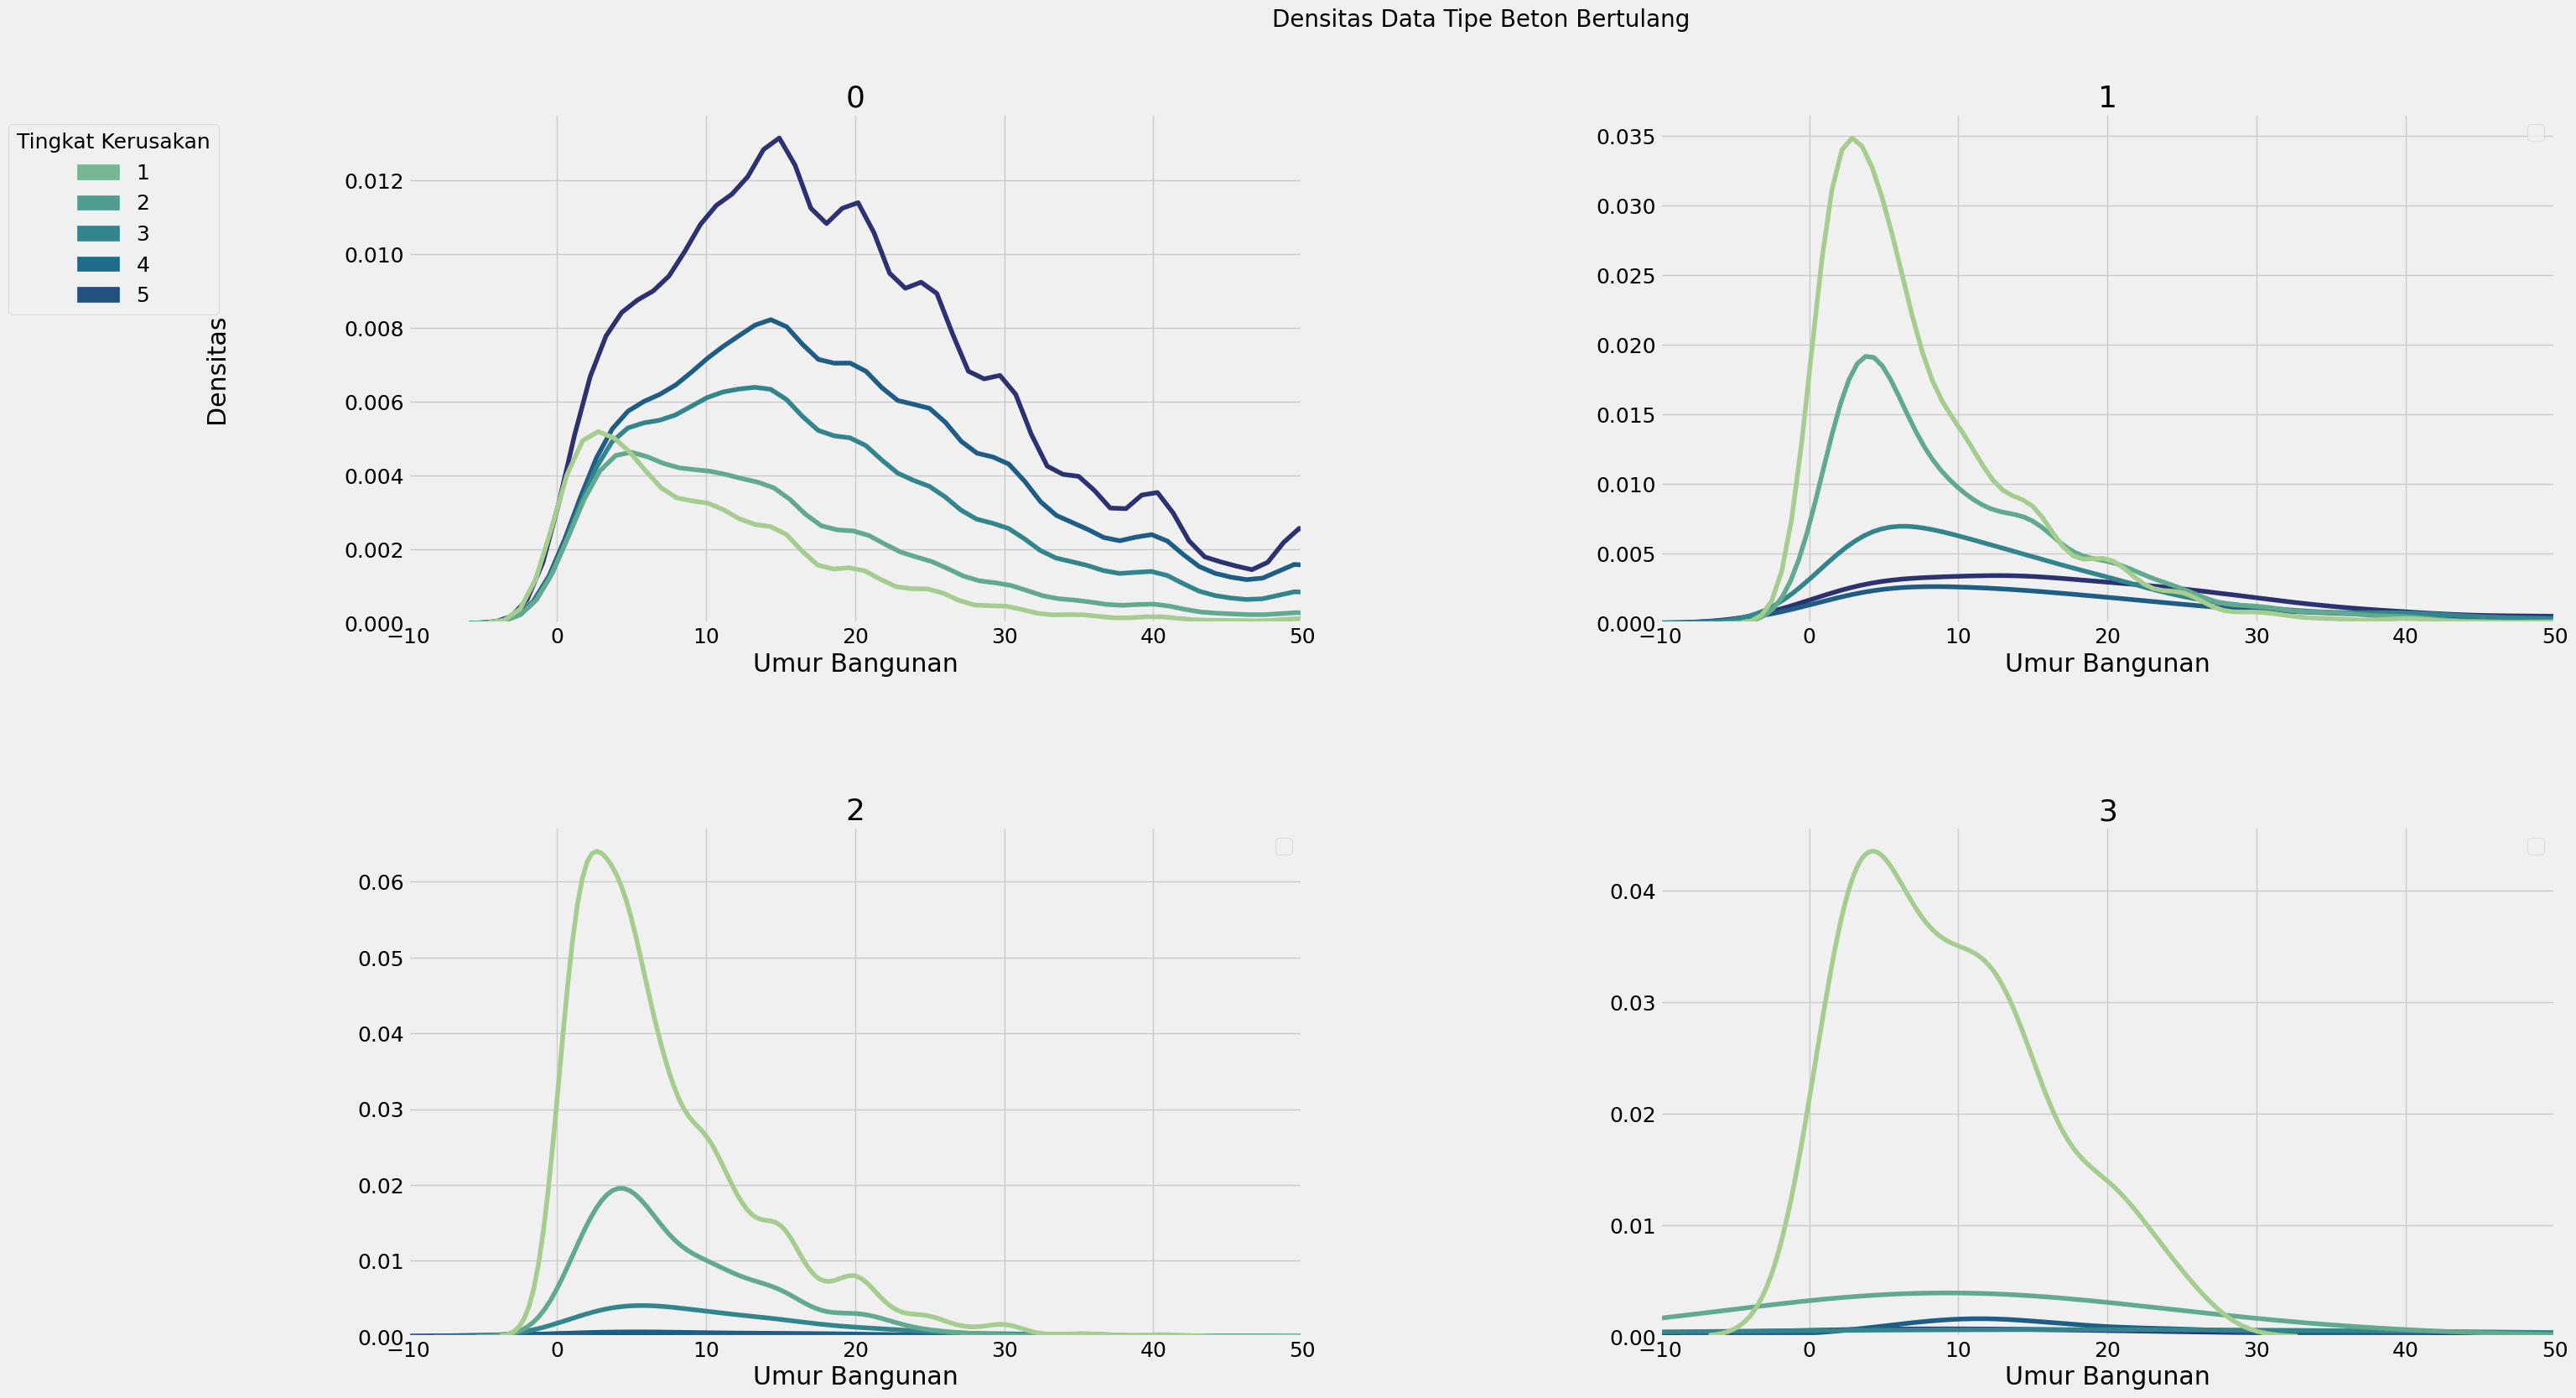

In [65]:
import matplotlib as mpl

fig = plt.figure(figsize=(32,18))

fig.suptitle('Densitas Data Tipe Beton Bertulang', fontsize=20)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.91,
                    wspace=0.4,
                    hspace=0.4)

plt.subplot(2,2,1)
df_bamboo = df_dropped_na[df_dropped_na['type_of_reinforcement_concrete'] == 0]
df_bamboo = df_bamboo[df_bamboo['old_building']!=999]
colors = sns.color_palette('crest', n_colors=5)[::-1]
handles = []
labels = [] 
ax = sns.kdeplot(x = df_bamboo['old_building'], hue=df_bamboo['damage_grade'], palette='crest')
for dg, color in zip(df_bamboo['damage_grade'].unique(), colors):
    handles.append(mpl.patches.Patch(color=color))
    labels.append(dg)
plt.xlim(-10,50)
plt.title(0)
plt.xlabel('Umur Bangunan')
plt.ylabel('Densitas')
ax.legend(handles=handles[::-1], labels=['1','2','3','4','5'], 
           loc='upper right', bbox_to_anchor=(-0.2, 1),
           title='Tingkat Kerusakan')
ax.yaxis.set_label_coords(-.2,.5)

plt.subplot(2,2,2)
df_bamboo = df_dropped_na[df_dropped_na['type_of_reinforcement_concrete'] == 1]
df_bamboo = df_bamboo[df_bamboo['old_building']!=999]
sns.kdeplot(x = df_bamboo['old_building'], hue=df_bamboo['damage_grade'], palette='crest')
plt.xlim(-10,50)
plt.title(1)
plt.xlabel('Umur Bangunan')
plt.ylabel('')
plt.legend('')

plt.subplot(2,2,3)
df_bamboo = df_dropped_na[df_dropped_na['type_of_reinforcement_concrete'] == 2]
df_bamboo = df_bamboo[df_bamboo['old_building']!=999]
sns.kdeplot(x = df_bamboo['old_building'], hue=df_bamboo['damage_grade'], palette='crest')
plt.xlim(-10,50)
plt.title(2)
plt.xlabel('Umur Bangunan')
plt.ylabel('')
plt.legend('')

plt.subplot(2,2,4)
df_bamboo = df_dropped_na[df_dropped_na['type_of_reinforcement_concrete'] == 3]
df_bamboo = df_bamboo[df_bamboo['old_building']!=999]
sns.kdeplot(x = df_bamboo['old_building'], hue=df_bamboo['damage_grade'], palette='crest')
plt.xlim(-10,50)
plt.title(3)
plt.xlabel('Umur Bangunan')
plt.ylabel('')
plt.legend('')

In [66]:
df.columns

Index(['floors_before_eq (total)', 'old_building', 'plinth_area (ft^2)',
       'height_before_eq (ft)', 'land_surface_condition', 'type_of_foundation',
       'type_of_roof', 'type_of_ground_floor', 'type_of_other_floor',
       'position', 'building_plan_configuration',
       'technical_solution_proposed', 'legal_ownership_status',
       'has_secondary_use', 'type_of_reinforcement_concrete',
       'residential_type', 'no_family_residing', 'public_place_type',
       'industrial_use_type', 'govermental_use_type',
       'flexible_superstructure', 'wall_binding', 'wall_material',
       'damage_grade'],
      dtype='object')

In [67]:
print(len(df))

722815


# Modelling

In [68]:
# Berikut adalah preprocessor dataframe, comment fungsi atau potongan kode jika tidak diperlukan
# Tahap preprocessing yang menggunakan lambda akan error jika masih ada nan value, jadi urutkan sesuai kebutuhan

def preprocessor_for_model(df) :

    # # Drop Technical Solution
    # df = df.drop('technical_solution_proposed', axis=1)

    # # Drop Nan Values
    # df = df.dropna()

    # # Mengisi Kolom Kategorial Dengan Modus
    # df_cat_col = df.select_dtypes(include=('object')).columns
    # for c in df_cat_col:
    #     df[c].fillna(df[c].mode().values[0], inplace=True)

    # # Mengisi Kolom Numerikal Dengan Median    
    # df.select_dtypes(include=(['int64', 'float64'])).isna().sum()
    # df_num_col = df.select_dtypes(include=(['int64', 'float64'])).columns
    # for c in df_num_col:
    #     df[c].fillna(df[c].median(), inplace=True)

    # # Preprocessing Kolom floors_before_eq
    # df['floors_before_eq (total)'] = df['floors_before_eq (total)'].apply(lambda x : transform_floors_before_eq(x) if not np.Nan else None)
    # df['floors_before_eq (total)'] = df['floors_before_eq (total)'].astype('int64')
    
    # Preprocessing Kolom type_of_foundation
    df['type_of_foundation'] = df['type_of_foundation'].replace({
    'Cement-Stone or Cement-Brick' : 'Cement-Stone/Brick',
    'Bamboo or Timber' : 'Bamboo/Timber',
    'RC' : 'Reinforced Concrete',
    'Bamboo/TImber' : 'Bamboo/Timber',
    'Others' : 'Other'
    })
    
    # Preprocessing Kolom type_of_foundation
    df['type_of_roof'] = df['type_of_roof'].replace({
    'Bamboo or Timber-Light roof' : 'Bamboo/Timber Light roof',
    'Bamboo or Timber Light roof' : 'Bamboo/Timber Light roof',
    'Bamboo or Timber Heavy roof' : 'Bamboo/Timber Heavy roof',
    'Wood Light Roof or Bamboo Light Roof' : 'Wood Light roof/Bamboo Light roof',
    'Wood Light Roof or Bamboo Heavy Roof' : 'Wood Light roof/Bamboo Heavy roof',
    'Bamboo/TImber-Light Roof' : 'Bamboo/Timber Light roof',
    'reinforced cement concrete/rb/rbc' : 'rcc/rb/rbc',
    'Reinforced Brick Slab/rcc/rbc' : 'rbs/rcc/rbc',
    'Bamboo/TImber-Heavy Roof' : 'Bamboo/Timber Heavy roof',
    'Bamboo or Timber Heavy Roof' : 'Bamboo/Timber Heavy roof',
    'Reinforced brick concrete/rcc/rbc' : 'rb/rbc'
    })

    # Preprocessing Kolom type_of_ground_floor
    df['type_of_ground_floor'] = df['type_of_ground_floor'].replace({
    'mud' : 'Mud',
    'Brick or Stone' : 'Brick/Stone',
    'reinforced concrete' : 'Reinforced Concrete',
    'RC' : 'Reinforced Concrete',
    'brick/stone' : 'Brick/Stone',
    'TImber' : 'Timber'
    })

    # Preprocessing Kolom type_of_other_floor
    df['type_of_other_floor'] = df['type_of_other_floor'].replace({
    'Timber-Planck' : 'Timber-Plank',
    'TImber/Bamboo-Mud' : 'Timber/Bamboo-Mud',
    'Timber Mud or Bamboo-Mud' : 'Timber Mud/Bamboo-Mud',
    'Wood or Bamboo Mud' : 'Wood/Bamboo-Mud',
    'Wood-Mud or Bamboo Mud' : 'Wood-Mud/Bamboo Mud',
    'Reinforced brick concrete/rcc/rbc' : 'rcc/rbc',
    'reinforced cement concrete/rb/rbc' : 'rcc/rb/rbc'
    })

    # # Preprocessing Kolom legal_ownership_status
    # df['legal_ownership_status'] = df['legal_ownership_status'].apply(lambda x : transform_use(x) if not np.Nan else None)

    # # Preprocessing Kolom plinth_area (ft^2)
    # df['plinth_area (ft^2)'] = df['plinth_area (ft^2)'].apply(lambda x : x.split(" ")[0] if x != "More than 1000 ft^2" else x.split(" ")[-2])
    # df['plinth_area (ft^2)'] = pd.to_numeric(df['plinth_area (ft^2)'])

    # # Preprocessing Kolom public_place_type
    # df['public_place_type'] = df['public_place_type'].apply(lambda x : 'Public' if x != 'Non-public' else x)
    
    return df


In [69]:
df_model = preprocessor_for_model(df.copy())

In [70]:
df_model_physic = df_model[['type_of_foundation', 'type_of_roof', 'type_of_ground_floor', 'type_of_other_floor', 'type_of_roof', 'wall_material', 'wall_binding', 'damage_grade']]

In [71]:
# type_of_foundation

aman_type_of_foundation = ['Bamboo/Timber','Reinforced Concrete','Cement-Stone/Brick','Other']
bahaya_type_of_foundation = ['Clay Sand Mixed mortar-Stone/Brick','Clay mortar-Stone/Brick','Mud mortar-Stone']

# type_of_ground_floor

aman_type_of_ground_floor = ['Timber','Reinforced Concrete','Timber','Other','Wood','Lumber']
bahaya_type_of_ground_floor = ['soil, water, loan Mixed','Mud','Clay']

# type_of_other_floor

aman_type_of_other_floor = ['rcc/rbc','Not applicable']
bahaya_type_of_ground_floor = ['Timber/Bamboo-Mud', 'Timber Mud/Bamboo-Mud', 'Wood/Bamboo-Mud','Wood-Plank','Timber-Plank','Lumber-plank','Wood-Mud/Bamboo Mud']

# type_of_roof
aman_type_of_roof = ['rbs/rcc/rbc','rcc/rb/rbc','rb/rbc']
bahaya_type_of_roof = ['Bamboo/Timber Light Roof','Wood Light roof/Bamboo Heavy roof','Wood Light roof/Bamboo Light roof','Bamboo/Timber Heavy roof']

# wall_material
aman_wall_material = [0,1,3]
bahaya_wall_material = [2]

# wall_binding
aman_wall_binding = [0,2,3,7]
bahaya_wall_binding = [1,5]

In [72]:
df_model_physic

type_of_foundation                       type_of_roof  \
0                            Bamboo/Timber           Bamboo/Timber Light roof   
1       Clay Sand Mixed mortar-Stone/Brick  Wood Light roof/Bamboo Heavy roof   
2                   Mud mortar-Stone/Brick                                NaN   
3                   Mud mortar-Stone/Brick                                NaN   
4       Clay Sand Mixed mortar-Stone/Brick  Wood Light roof/Bamboo Light roof   
...                                    ...                                ...   
722810  Clay Sand Mixed mortar-Stone/Brick           Bamboo/Timber Light roof   
722811                                 NaN                                NaN   
722812                                 NaN                                NaN   
722813             Clay mortar-Stone/Brick  Wood Light roof/Bamboo Light roof   
722814                       Bamboo/Timber           Bamboo/Timber Light roof   

       type_of_ground_floor  type_of_other_floor  \
0                      Clay    Timber/Bamboo-Mud   
1                      Clay    Timber/Bamboo-Mud   
2                      Clay  Wood-Mud/Bamboo Mud   
3                      Clay  Wood-Mud/Bamboo Mud   
4                      Clay    Timber/Bamboo-Mud   
...                     ...                  ...   
722810                 Clay    Timber/Bamboo-Mud   
722811                  NaN                  NaN   
722812                  NaN                  NaN   
722813                 Clay  Wood-Mud/Bamboo Mud   
722814                  Mud    Timber/Bamboo-Mud   

                             type_of_roof  wall_material  wall_binding  \
0                Bamboo/Timber Light roof            0.0           0.0   
1       Wood Light roof/Bamboo Heavy roof            2.0           5.0   
2                                     NaN            2.0           5.0   
3                                     NaN            2.0           5.0   
4       Wood Light roof/Bamboo Light roof            2.0           5.0   
...                                   ...            ...           ...   
722810           Bamboo/Timber Light roof            2.0           5.0   
722811                                NaN            NaN           5.0   
722812                                NaN            NaN           5.0   
722813  Wood Light roof/Bamboo Light roof            2.0           5.0   
722814           Bamboo/Timber Light roof            0.0           0.0   

        damage_grade  
0                1.0  
1                5.0  
2                5.0  
3                5.0  
4                4.0  
...              ...  
722810           3.0  
722811           4.0  
722812           4.0  
722813           5.0  
722814           1.0  

[722815 rows x 8 columns]

In [73]:
sub_set = df_model_physic.iloc[:20]

In [74]:
sub_set

type_of_foundation                       type_of_roof  \
0                        Bamboo/Timber           Bamboo/Timber Light roof   
1   Clay Sand Mixed mortar-Stone/Brick  Wood Light roof/Bamboo Heavy roof   
2               Mud mortar-Stone/Brick                                NaN   
3               Mud mortar-Stone/Brick                                NaN   
4   Clay Sand Mixed mortar-Stone/Brick  Wood Light roof/Bamboo Light roof   
5   Clay Sand Mixed mortar-Stone/Brick           Bamboo/Timber Light roof   
6                                  NaN                                NaN   
7                                  NaN                                NaN   
8   Clay Sand Mixed mortar-Stone/Brick                                NaN   
9              Clay mortar-Stone/Brick           Bamboo/Timber Light roof   
10  Clay Sand Mixed mortar-Stone/Brick           Bamboo/Timber Light roof   
11             Clay mortar-Stone/Brick           Bamboo/Timber Light roof   
12  Clay Sand Mixed mortar-Stone/Brick  Wood Light roof/Bamboo Light roof   
13  Clay Sand Mixed mortar-Stone/Brick                                NaN   
14  Clay Sand Mixed mortar-Stone/Brick                                NaN   
15                                 NaN                                NaN   
16                                 NaN                                NaN   
17                                 NaN                                NaN   
18                                 NaN                                NaN   
19                                 NaN                                NaN   

   type_of_ground_floor    type_of_other_floor  \
0                  Clay      Timber/Bamboo-Mud   
1                  Clay      Timber/Bamboo-Mud   
2                  Clay    Wood-Mud/Bamboo Mud   
3                  Clay    Wood-Mud/Bamboo Mud   
4                  Clay      Timber/Bamboo-Mud   
5                  Clay  Timber Mud/Bamboo-Mud   
6                   NaN                    NaN   
7                   NaN                    NaN   
8                  Clay    Wood-Mud/Bamboo Mud   
9                  Clay      Timber/Bamboo-Mud   
10                 Clay      Timber/Bamboo-Mud   
11                  Mud         Not applicable   
12                 Clay        Wood/Bamboo-Mud   
13          Brick/Stone      Timber/Bamboo-Mud   
14          Brick/Stone      Timber/Bamboo-Mud   
15                  NaN                    NaN   
16                  NaN                    NaN   
17                  NaN                    NaN   
18                  NaN                    NaN   
19                  NaN                    NaN   

                         type_of_roof  wall_material  wall_binding  \
0            Bamboo/Timber Light roof            0.0           0.0   
1   Wood Light roof/Bamboo Heavy roof            2.0           5.0   
2                                 NaN            2.0           5.0   
3                                 NaN            2.0           5.0   
4   Wood Light roof/Bamboo Light roof            2.0           5.0   
5            Bamboo/Timber Light roof            2.0           5.0   
6                                 NaN            NaN           5.0   
7                                 NaN            NaN           5.0   
8                                 NaN            2.0           5.0   
9            Bamboo/Timber Light roof            2.0           5.0   
10           Bamboo/Timber Light roof            2.0           5.0   
11           Bamboo/Timber Light roof            2.0           5.0   
12  Wood Light roof/Bamboo Light roof            2.0           5.0   
13                                NaN            2.0           5.0   
14                                NaN            2.0           5.0   
15                                NaN            NaN           5.0   
16                                NaN            NaN           5.0   
17                                NaN            NaN           NaN   
18                   

In [75]:
for x in sub_set.columns :
    print(x)

type_of_foundation
type_of_roof
type_of_ground_floor
type_of_other_floor
type_of_roof
wall_material
wall_binding
damage_grade


In [76]:
def material_imputer(df) :
    nan_count = 0
    for i in range (len(df)) :
        if str(df.iloc[i]['type_of_foundation'])=='nan' :
            nan_count = nan_count+1
        if str(df.iloc[i]['type_of_roof'])=='nan' :
            nan_count = nan_count+1
        if str(df.iloc[i]['type_of_ground_floor'])=='nan' :
            nan_count = nan_count+1
        if str(df.iloc[i]['type_of_other_floor'])=='nan' :
            nan_count = nan_count+1
        if str(df.iloc[i]['type_of_roof'])=='nan' :
            nan_count = nan_count+1
        if str(df.iloc[i]['wall_material'])=='nan' :
            nan_count = nan_count+1
        if str(df.iloc[i]['wall_binding'])=='nan' :
            nan_count = nan_count+1
    print(nan_count)

In [77]:
material_imputer(sub_set)

30


In [78]:
def feature_engineering (df) :
    # Penyamarataan mortar-Stone/Brick pada type_of_foundation
    df['type_of_foundation'] = df['type_of_foundation'].replace({
    'Clay Sand Mixed mortar-Stone/Brick' : 'mortar-Stone/Brick',
    'Clay mortar-Stone/Brick' : 'mortar-Stone/Brick',
    'Mud mortar-Stone/Brick' : 'mortar-Stone/Brick',
    })

    return df

In [79]:
# tmp = df.copy()
# df_model = preprocessor_for_model(tmp)

In [80]:
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import OneHotEncoder

# TARGET = 'damage_grade'

# scaler = MinMaxScaler()
# data_num = df_model.select_dtypes(include='number').drop(TARGET, axis=1)
# data_num['old_building'] = scaler.fit_transform(data_num['old_building'].to_numpy().reshape(-1,1))
# data_cat = df_model.select_dtypes(include='object')
# encoder = OneHotEncoder(drop='first')
# concat = pd.concat([data_num, pd.DataFrame(encoder.fit_transform(data_cat).toarray(), columns=encoder.get_feature_names(data_cat.columns)), df_model[TARGET]], axis=1)
# concat = concat.dropna()

In [81]:
# from sklearn.model_selection import train_test_split
# X = concat.drop(TARGET, axis=1)
# y = concat[TARGET]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [82]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import f1_score
# model = RandomForestClassifier(n_estimators=100, max_depth=41)
# model.fit(X_train, y_train)
# result = model.predict(X_test)
# score = f1_score(y_test, result, average='macro')
# score

# Temp

In [83]:
# Heatmap Code
# fig, ax = plt.subplots(figsize=(10,8))
# num_col = df_dropped_na.select_dtypes(include=(['int64', 'float64'])).columns
# mask = np.triu(np.ones_like(df_dropped_na[num_col].corr(), dtype=np.bool_))
# mask = mask[1:, :-1]
# df_corr = df_dropped_na.corr()
# corr = df_corr.iloc[1:,:-1].copy()
# sns.heatmap(corr, annot=True, mask=mask, vmin=-1, vmax=1,fmt=".2f")